#(1)Add GPU and RAM for colab

In [ ]:
#subscription version
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May  3 13:39:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#subscription version
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#free version GPU
!ln -sf /opt/bin/nvida-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=cb837eea06a88f15548c58ab1ec373c9582512243969cfa3df21190c99bcf0b2
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil


#(2)Mounting Google Drive for Colab

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#(3)Import libraries for the project

In [ ]:
import os
import sys
import random
import re
import time
import numpy as np
import pandas as pd
import cv2
import math
import PIL
from cv2 import imread
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import pickle
import pdb
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


#(4)Correct version of TensorFlow and its support

In [ ]:
!pip install h5py==2.10.0
!pip install opencv-python
!pip install scikit.image==0.16.2
!pip install pycocotools
print("Installed packages")

Installed packages


In [ ]:
!pip install q keras==2.1.6
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
1.15.2


In [ ]:
import keras
import skimage as ski
import skimage.io

print(tf.__version__)
print(keras.__version__)
print(ski.__version__)

1.15.2
2.1.6
0.16.2


Using TensorFlow backend.


#(5)Correct path from Google Drive to Colab for the project

In [ ]:
#Main path of the project and mask-rcnn
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/Detection")
Mask_RCNN_DIR = os.path.join(ROOT_DIR, "Mask_RCNN")
sys.path.append(Mask_RCNN_DIR)


In [ ]:
#path of datasets
BRASSICA_DIR = os.path.join(ROOT_DIR, "Brassica")


#Path of CSV datasets of training 
ANNOTATION_DIR = os.path.join(BRASSICA_DIR, "Train_annotation")
annotation_file = os.path.join(ANNOTATION_DIR, "annot_train.csv")#Train with bra017
#annotation_file = os.path.join(ANNOTATION_DIR, "annot_train_bra022.csv")#Train with bra022

#Path of image datasets
IMAGE_DIR = os.path.join(BRASSICA_DIR, "Image")#Brassica017 images
#IMAGE_DIR = os.path.join(BRASSICA_DIR, "Val_images_brassica022")#Brassica022 images
#IMAGE_DIR = os.path.join(BRASSICA_DIR, "images_and_022")#Image fold and Val_images_brassica022 together

#Path of changed library for mask-rcnn
SCRIPTS_DIR = os.path.join(BRASSICA_DIR, "Scripts")

#Path of CSV datasets of validation 
VAL_ANNOTATION_DIR = os.path.join(BRASSICA_DIR, "Val_annotation")#Training and testing
val_annotation_file = os.path.join(VAL_ANNOTATION_DIR, "annot_val.csv")#Validate bra017
#val_annotation_file = os.path.join(VAL_ANNOTATION_DIR, "annot_val_brassica022.csv")#Validate bra022 for testing
#val_annotation_file = os.path.join(VAL_ANNOTATION_DIR, "annot_val_bra022.csv")#bra022 and validate 017 for training Siliques_mask_rcnn_trained_2.h5

#The model log path
MODEL_DIR = os.path.join(BRASSICA_DIR, "log")

#Path of testing images without annotation
TEST_IMAGE_DIR = os.path.join(BRASSICA_DIR, "Image")

#Model trained file path
COCO_MODEL_PATH = os.path.join(Mask_RCNN_DIR, "mask_rcnn_coco.h5")
SILIQUES_MODEL_PATH = os.path.join(Mask_RCNN_DIR, "Siliques_mask_rcnn_trained_1.h5")
#SILIQUES_MODEL_PATH = os.path.join(Mask_RCNN_DIR, "Siliques_mask_rcnn_trained_2.h5")#train with bra022

IMAGE_DIR, SCRIPTS_DIR,COCO_MODEL_PATH, SILIQUES_MODEL_PATH, MODEL_DIR, val_annotation_file, annotation_file, val_annotation_file

('/content/drive/MyDrive/Detection/Brassica/Image',
 '/content/drive/MyDrive/Detection/Brassica/Scripts',
 '/content/drive/MyDrive/Detection/Mask_RCNN/mask_rcnn_coco.h5',
 '/content/drive/MyDrive/Detection/Mask_RCNN/Siliques_mask_rcnn_trained_1.h5',
 '/content/drive/MyDrive/Detection/Brassica/log',
 '/content/drive/MyDrive/Detection/Brassica/Val_annotation/annot_val.csv',
 '/content/drive/MyDrive/Detection/Brassica/Train_annotation/annot_train.csv',
 '/content/drive/MyDrive/Detection/Brassica/Val_annotation/annot_val.csv')

In [ ]:
#Using a local library
sys.path.append(SCRIPTS_DIR) 

#(6)Import mask-rcnn for the project

In [ ]:
from mrcnn.config import Config
# from mrcnn import utils (original version)
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
import mrcnn
import utils1 as utils #Changed version
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


#(7)Add training datasets and validation datasets

In [ ]:
#A training dataset
anno = pd.read_csv(annotation_file)
anno

Unnamed: 0    filename  file_size  \
0              0   JD201.jpg    4743030   
1              1   JD201.jpg    4743030   
2              2   JD201.jpg    4743030   
3              3   JD201.jpg    4743030   
4              4   JD201.jpg    4743030   
...          ...         ...        ...   
7253        7253  JD3215.jpg    4794272   
7254        7254  JD3215.jpg    4794272   
7255        7255  JD3215.jpg    4794272   
7256        7256  JD3215.jpg    4794272   
7257        7257  JD3215.jpg    4794272   

                                     file_attributes  region_count  region_id  \
0     {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}           113          0   
1     {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}           113          1   
2     {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}           113          2   
3     {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}           113          3   
4     {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}           113          4   
...                                              ...           ...        ...   
7253  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            51         46   
7254  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            51         47   
7255  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            51         48   
7256  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            51         49   
7257  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            51         50   

                                region_shape_attributes region_attributes  
0     {"name":"polygon","all_points_x":[948,957,965,...    {"silique":""}  
1     {"name":"polygon","all_points_x":[902,932,953,...    {"silique":""}  
2     {"name":"polygon","all_points_x":[948,977,991,...    {"silique":""}  
3     {"name":"polygon","all_points_x":[1060,1099,11...    {"silique":""}  
4     {"name":"polygon","all_points_x":[1123,1188,12...    {"silique":""}  
...                                                 ...               ...  
7253  {"name":"polygon","all_points_x":[1114,1120,11...    {"silique":""}  
7254  {"name":"polygon","all_points_x":[1027,1035,10...    {"silique":""}  
7255  {"name":"polygon","all_points_x":[1046,1051,10...    {"silique":""}  
7256  {"name":"polygon","all_points_x":[984,988,987,...    {"silique":""}  
7257  {"name":"polygon","all_points_x":[884,888,891,...    {"silique":""}  

[7258 rows x 8 columns]

In [ ]:
#A validation dataset
val_anno = pd.read_csv(val_annotation_file)
val_anno

Unnamed: 0    filename  file_size  \
0             0  JD3230.jpg    4819256   
1             1  JD3230.jpg    4819256   
2             2  JD3230.jpg    4819256   
3             3  JD3230.jpg    4819256   
4             4  JD3230.jpg    4819256   
..          ...         ...        ...   
810         810  JD1722.jpg    4810059   
811         811  JD1722.jpg    4810059   
812         812  JD1722.jpg    4810059   
813         813  JD1722.jpg    4810059   
814         814  JD1722.jpg    4810059   

                                    file_attributes  region_count  region_id  \
0    {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            53          0   
1    {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            53          1   
2    {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            53          2   
3    {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            53          3   
4    {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            53          4   
..                                              ...           ...        ...   
810  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            49         44   
811  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            49         45   
812  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            49         46   
813  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            49         47   
814  {'Width': 6000, 'Height': 4000, 'Type': 'MPO'}            49         48   

                               region_shape_attributes region_attributes  
0    {"name":"polygon","all_points_x":[4167,4170,41...    {"silique":""}  
1    {"name":"polygon","all_points_x":[4003,4005,40...    {"silique":""}  
2    {"name":"polygon","all_points_x":[4052,4055,40...    {"silique":""}  
3    {"name":"polygon","all_points_x":[3829,3834,38...    {"silique":""}  
4    {"name":"polygon","all_points_x":[3870,3874,38...    {"silique":""}  
..                                                 ...               ...  
810  {"name":"polygon","all_points_x":[2401,2404,24...    {"silique":""}  
811  {"name":"polygon","all_points_x":[2417,2420,24...    {"silique":""}  
812  {"name":"polygon","all_points_x":[2634,2635,26...    {"silique":""}  
813  {"name":"polygon","all_points_x":[2655,2659,26...    {"silique":""}  
814  {"name":"polygon","all_points_x":[2634,2637,26...    {"silique":""}  

[815 rows x 8 columns]

#(8)Create a class for datasets




In [ ]:
class SiliqueDataset(utils.Dataset):
  def load_silique_brassica(self, annotDF, img_dir=IMAGE_DIR,mode='train'):
    self.add_class("brassica", 1, "sl")
    if mode == 'train':
      fileList=[]
     
      n = 0
      for i in range(annotDF.shape[0]):
        imfn = annotDF['filename'].iloc[i]
        if imfn in fileList:
          continue
        #
        idx = np.where(annotDF["filename"] == imfn)
        if len(idx) == 0:
          continue
        cnt = annotDF['region_count'].iloc[i]
        if cnt <= 0:
          continue
        af = annotDF.iloc[idx]
        if len(af.shape) == 1: 
          af = pd.DataFrame(af.values.reshape(1, af.shape[0]), columns=annotDF.columns)
        attr = eval(af["file_attributes"].iloc[0])
        try:
          width = attr['Width']
          height = attr['Height']
        except:
          image = imread(os.path.join(img_dir, imfn))
          height, width, channel = image.shape

        self.add_image("brassica", n + 1, path=os.path.join(img_dir, imfn),
                filename=imfn, count=cnt, annotDF=af,
                width=width, height=height)
        fileList.append(imfn)
        n += 1
    elif mode == 'test':
      if 'filename' in annotDF:
        fileList = annotDF['filename'].drop_duplicates()
      
      fileList = fileList.tolist()
      for i in range(len(fileList)):
        imfn = fileList[i]
        self.add_image("brassica", i+1, path=os.path.join(img_dir, imfn),
                filename=imfn)
    else:
      print('Please enter either "train" or "test"')
      exit(0)

    print('Total number of annotated images:', len(fileList))
    return (fileList)
  
  def load_bbox(self, image_id, ratio=1):
    info = self.image_info[image_id]
    imfn = info["filename"]
    af = info["annotDF"]

    n = af.shape[0]  
   
    boxes = np.empty(shape=[0, 4], dtype=np.int32)
    counter = 0;
    for i in range(n):
      rn = eval(af["region_attributes"].iloc[i])
    
      if 'silique' not in rn:
        continue
      
      try:
        ra = eval(af["region_shape_attributes"].iloc[i])

        boxes = np.append(boxes, [[min(ra['all_points_y']), min(ra['all_points_x']), max(ra['all_points_y']),
                                           max(ra['all_points_x'])]], axis=0)
        if ratio!=1:
          boxes = np.round(boxes * ratio)
      except ValueError:
        print('-- invalid region entry, skip this row!')
        continue
      counter += 1

    class_ids = np.full(n, 1)  
    return np.array(boxes), class_ids.astype(np.int32)

  def load_mask(self, image_id, ratio=1):
        info = self.image_info[image_id]

        af = info["annotDF"]

        imfn = info["filename"]
        print(imfn)

        n = af.shape[0]  

        mask = np.empty(shape=(info['height'], info['width'], 0), dtype=np.uint8);
        x = []
        y = []
        counter = 0;
        for i in range(n):
            rn = eval(af["region_attributes"].iloc[i])
            
            if 'silique' not in rn:
                continue
          
            try:
                ra = eval(af["region_shape_attributes"].iloc[i])
                x = ra['all_points_x']
                y = ra['all_points_y']
                if ratio!=1:
                    x = np.round(x * ratio)
                    y = np.round(y * ratio)
                
                shape = (info['height'], info['width'], 1)
                m = self.polygons_to_mask(shape, x, y)
                
                m = m.reshape(shape)
              
                mask = np.append(mask, m, axis=2)
                counter += 1
            except:
                continue

        class_ids = np.full(counter, 1)
        
        return mask.astype(bool), class_ids.astype(np.int32)

  def polygons_to_mask(self, img_shape, x, y):
        mask = np.zeros(img_shape[:2], dtype=np.uint8)
        mask = Image.fromarray(mask)
     
        ImageDraw.Draw(mask).polygon(xy=[xy for xy in zip(x, y)], outline=1, fill=1)
        mask = np.array(mask, dtype=bool)
        return mask

  def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)      

#(9)Functions for testing 

In [ ]:
def apply_mask(image, mask, color, alpha=0.5):
    """apply mask to image"""
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def random_colors(N):
    np.random.seed(1)
    colors = [tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors



def display_instances(image, boxes, masks, ids, names, scores, fontScale=0.7, lwd=2,
                      plotbox=True, plottext=True):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)
    if 'ndarray' not in str(type(masks)):
        masks = tuple2masks({'masks': masks, 'imshape': image.shape})

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]
        if mask.astype(np.int).sum() == 0:
            print('empty mask!')
            color = (255, 0, 0)

        image = apply_mask(image, mask, color)
        if plotbox:
            
            image = cv2.rectangle(image, (x1, y1), (x2, y2), color, lwd)
        if plottext:
            image = cv2.putText(
            
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, fontScale, color, lwd
            )
    return image

def display_instances_new(image, boxes, ids, names, scores, fontScale=0.7, lwd=2,
                      plotbox=True, plottext=True):
    """
        take the image and results and apply the box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label

        if plotbox:
            
            image = cv2.rectangle(image, (x1, y1), (x2, y2), color, lwd)
        if plottext:
            image = cv2.putText(
          
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, fontScale, color, lwd
            )
    return image

def post_SNMS(r, sigma=0.5, method='gaussian', confMin=0.5, ovMax=0.5):
    boxes = r['rois']
    scores = r['scores']
    class_ids = r['class_ids']
    print(scores.shape)
    idxD = [];
    scores1 = [];
    cls_ids = [];
    for cls_id in np.unique(class_ids):
        idxcls = np.where(class_ids == cls_id)[0]
        if method == 'gaussian':
            idxdetect, scoresw = utils.soft_non_max_suppression(boxes[idxcls], scores[idxcls], sigma=sigma,
                                                                method='gaussian', score_threshold=confMin)
        elif method == '':
            idxdetect = utils.non_max_suppression(boxes[idxcls], scores[idxcls], threshold=ovMax)
            scoresw = scores;

        scores1.extend(scoresw.tolist())
        idxD.extend(idxdetect.tolist())
       
    idxD = np.array(idxD);
   
    scores1 = np.array(scores1);
    if len(idxD) == 0:
       
        r1 = {'rois': idxD, 'scores': idxD, 'class_ids': idxD, 'masks': idxD}
       
    else:
        r1 = {'rois': boxes[idxD], 'scores': scores1[idxD], 'class_ids': r['class_ids'][idxD],
              'masks': r['masks'][..., idxD]}

    print('ROI counts:', r['rois'].shape[0])
    print('ROI counts(SNMS):', idxD.shape[0])
    return (r1, idxD, scores1)

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def display_annot(dataset, IMG_SAVE_DIR):
    image_ids = range(len(dataset.image_info))
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        boxes, class_ids = dataset.load_bbox(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        scores = np.zeros(boxes.shape[0])
        print(boxes.shape)
        
        im1 = display_instances(image, boxes, mask, class_ids, dataset.class_names, scores,plotbox=True,plottext=False)
        plantid = dataset.image_info[image_id]['filename'].replace('.jpg', '')
    
        print('plantid: ', plantid)
        #
        name = os.path.join(IMG_SAVE_DIR, str(image_id) + '-' + plantid + '-SiliqueVal' + '.jpg')
        im = PIL.Image.fromarray(im1)
        im.save(name)


def augmented_detect(model, image, augment=False, 
        seqSNMS=True, sigma=1, confMin=0.5, ovMax=0.5, verbose=1):
    r0 = model.detect([image], verbose=verbose)[0]
    count0 = r0['rois'].shape[0]
    
    
    if False: 
        imager, null, null1 = utils.fliph(img=image, bboxes=None)
        rr = model.detect([imager], verbose=verbose)[0]
        countr = rr['rois'].shape[0]
     
        if False: 
            rr = post_SNMS(r=rr, sigma=sigma, confMin=confMin)[0]
       

        if countr>0: 
            null, bboxesf, masksf = utils.fliph(img=imager, bboxes=rr['rois'], masks=rr['masks'])
            del (null)
            del (imager)
        else:
            bboxesf = np.array([])
            masksf = np.array([])

        rr['rois'] = bboxesf
        rr['masks'] = masksf
        rc = {}
        for k in r0:
          
            if k == 'masks':
                rc[k] = np.concatenate((r0[k], rr[k]), axis=2)
            else:
                rc[k] = np.concatenate((r0[k], rr[k]), axis=0)
           
        countc = rc['rois'].shape[0]
        r0 = rc;    
        count0 = r0['rois'].shape[0]
       

    if seqSNMS and count0 > 0:
        r0 = post_SNMS(r=r0, sigma=sigma, confMin=confMin)[0]        
        

    return (r0)
  
def infer_images(image_id, dataset, IMG_SAVE_DIR,config=None):
  
        image = dataset.load_image(image_id)
        if config is None or config.DETECTION_NMS_METHOD == 'NMS':
          results = model.detect([image], verbose=1)
          r = results[0]
        elif config.DETECTION_NMS_METHOD == 'SNMS':
          sigma = config.DETECTION_SNMS_SIGMA 
          confMin = config.DETECTION_MIN_CONFIDENCE 
          ovMax = config.DETECTION_NMS_THRESHOLD
          r = augmented_detect(model, image, sigma, confMin, ovMax, verbose=1)


        im1 = display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                    dataset.class_names, r['scores'])
        plantid = dataset.image_info[image_id]['filename'].replace('.jpg','')
        image_name = dataset.image_info[image_id]['filename']


        if not os.path.isdir(IMG_SAVE_DIR):
            os.makedirs(IMG_SAVE_DIR)
        name = os.path.join(IMG_SAVE_DIR, str(image_id)+'-'+plantid+'-SiliquePre' +'.jpg')
        im = PIL.Image.fromarray(im1)

        return im, name, r, image_name


def save_infer_images(dataset, IMG_SAVE_DIR,config=None):
  for image_id in range(len(dataset.image_info)):
    im, name, r, image_name= infer_images(image_id, dataset, IMG_SAVE_DIR,config)
    im.save(name)

def save_infer_pkl(dataset, IMG_SAVE_DIR,config=None):
  for image_id in range(len(dataset.image_info)):
    im, name, r, image_name= infer_images(image_id, dataset, IMG_SAVE_DIR,config)
    save_obj(r, name)

def save_infer_CSV(dataset, IMG_SAVE_DIR,config=None):
    csv=pd.DataFrame(columns=['image_names', 'rois', 'masks', 'class_ids','scores'])
    for image_id in range(len(dataset.image_info)):
      im, name, r, image_name= infer_images(image_id, dataset, IMG_SAVE_DIR,config)
      csv=csv.append({'image_names': image_name, 'rois':r['rois'], 'masks':r['masks'], 'class_ids':r['class_ids'],'scores':r['scores']}, ignore_index=True)
      print(csv)
    csv.to_csv(IMG_SAVE_DIR)


#(10)Loading annotation of datasets to object

In [ ]:
# Training data with annotation data
dataset_train = SiliqueDataset()
dataset_train.load_silique_brassica(annotDF=anno, mode='train')
dataset_train.prepare()

Total number of annotated images: 194


In [ ]:
# Validation data with validation annotation data
dataset_val = SiliqueDataset()
dataset_val.load_silique_brassica(annotDF=val_anno, mode='train')
dataset_val.prepare()

Total number of annotated images: 19


#(11)Configuration for model

In [ ]:
class SiliquesConfig(Config):
    """Training Configuration for siliques dataset.
    The specific values  have been changed from the default Config class for the siliques dataset.
    """
    # A name for the configuration
    NAME = "Siliques"

    # Default was 'SGD', 'ADAM' is an optimizer, 
    OPTIMIZER = 'ADAM'

    # Train on 1 GPU and 1 image per GPU. 
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 1 shapes

    # Different size of  images will affect the training speed
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024

    # Default size for anchors in 
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128) 

    #Number of ROIs are left after non-maximum supression for training
    POST_NMS_ROIS_TRAINING = 2048
   
    #Number of ROIs are left after non-maximum supression for inference
    POST_NMS_ROIS_INFERENCE = 2048

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE = 320

    # Number of samples taken before an training epoch is finish
    STEPS_PER_EPOCH = 300

    # Number of ROIs per image to feed to classifier/mask heads
    TRAIN_ROIS_PER_IMAGE = 200

    # Number of samples taken before an validation epoch is finish
    VALIDATION_STEPS = 50

    # Give the maximum number  of  siliques per image for detection
    DETECTION_MAX_INSTANCES = 200

   # Filter the overlapping ROIs by a value of thershold
    DETECTION_NMS_THRESHOLD = 0.5; 
 
  # Give confidenct value for scores left after detection
    DETECTION_MIN_CONFIDENCE = 0.6; 
   
    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 150


config = SiliquesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        200
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.5
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

#(12)Create a training model

In [ ]:
#pdb.set_trace() # For debugging
model = mrcnn.model.MaskRCNN(mode="training", 
                model_dir=MODEL_DIR ,
                config=config)
model.keras_model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (

#(13)Add a weight to the training model

In [ ]:
model.load_weights(COCO_MODEL_PATH, 
                                 by_name=True,
                                 exclude = ["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
print("loaded")







loaded


#(14)Training the model

In [ ]:
model.train(train_dataset=dataset_train,
      val_dataset=dataset_val,
      learning_rate=config.LEARNING_RATE,
      epochs=5,
      layers="all")


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Detection/Brassica/log/siliques20220416T1543/mask_rcnn_siliques_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b     

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/5
JD357.jpg
JD217.jpg
JD228.jpg
JD301.jpg
JD254.jpg
JD277.jpg
JD1818.jpg
JD355.jpg
JD2458.jpg
JD1414.jpg
BR022-530142-6.jpg
JD225.jpg
BR022-532138-6B.jpg
JD324.jpg
JD2508.jpg
JD262.jpg
JD2251.jpg
JD240.jpg
 17/300 [>.............................] - ETA: 31:58 - loss: 3.7475 - rpn_class_loss: 0.5163 - rpn_bbox_loss: 1.4594 - mrcnn_class_loss: 0.1340 - mrcnn_bbox_loss: 0.9800 - mrcnn_mask_loss: 0.6576JD275.jpg
JD1818.jpg
 23/300 [=>............................] - ETA: 34:55 - loss: 3.6348 - rpn_class_loss: 0.4656 - rpn_bbox_loss: 1.4222 - mrcnn_class_loss: 0.1398 - mrcnn_bbox_loss: 0.9517 - mrcnn_mask_loss: 0.6555JD359.jpg
JD217.jpg
 25/300 [=>............................] - ETA: 36:50 - loss: 3.5679 - rpn_class_loss: 0.4388 - rpn_bbox_loss: 1.3969 - mrcnn_class_loss: 0.1443 - mrcnn_bbox_loss: 0.9385 - mrcnn_mask_loss: 0.6495BR022-532138-6B.jpg
JD231.jpg
 33/300 [==>...........................] - ETA: 34:02 - loss: 3.3631 - rpn_class_loss: 0.3637 - rpn_bbox_loss: 1.3169 - mrcnn

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2348: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


BR022-530145-1.jpg
JD3473.jpg
JD3396.jpg
JD3246.jpg
JD3421.jpg
JD3184.jpg
JD264.jpg
JD3450.jpg
JD3357.jpg
JD274.jpg
JD3237.jpg
BR022-530128-3.jpg
JD3237.jpg
BR022-53012B-3A.jpg
JD3382.jpg
JD3246.jpg
JD250.jpg
BR02253012A-3B.jpg
JD274.jpg
JD3337.jpg
JD381.jpg
JD1231.jpg
JD3329.jpg
JD3450.jpg
JD3374.jpg
JD274.jpg
JD3363.jpg
JD252.jpg
JD3094.jpg
JD3492.jpg
JD244.jpg
JD262.jpg
JD3396.jpg
JD1722.jpg
JD895.jpg
JD233.jpg
JD266.jpg
JD306.jpg
JD322.jpg
JD2251.jpg
JD3246.jpg
JD1722.jpg
JD2760.jpg
JD2794.jpg
JD1678.jpg
JD3357.jpg
JD2392.jpg
JD253.jpg
JD3230.jpg
BR022-530128-3.jpg
JD1932.jpg
BR022-209141-1.jpg
JD040.jpg
JD1151.jpg
JD1686.jpg
JD273.jpg
JD3382.jpg
JD3337.jpg
JD1686.jpg
JD3431.jpg
JD2265.jpg
JD2164.jpg
JD3329.jpg
JD3431.jpg
BR022-532131-2.jpg
JD3396.jpg
JD1932.jpg
JD1678.jpg
BR022-239112-4B.jpg
JD3492.jpg
JD941.jpg
JD1171.jpg
JD3237.jpg
JD378.jpg
JD3421.jpg
JD214.jpg
JD218.jpg
JD3363.jpg
JD326.jpg
JD219.jpg
JD2985.jpg
JD1066.jpg
JD1614.jpg
JD266.jpg
JD3230.jpg
JD236.jpg
JD281.jpg
JD2

#(15)Save the training model

In [ ]:
model.keras_model.save_weights(SILIQUES_MODEL_PATH)
print("done!")

done!


#(16)Setting inference configuration 

In [ ]:
class InferenceConfig(SiliquesConfig):

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    ROI_POSITIVE_RATIO = 0.5
    DETECTION_MAX_INSTANCES = 500
    DETECTION_NMS_THRESHOLD = 0.5
    DETECTION_MIN_CONFIDENCE = 0.7
   
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
  
    DETECTION_NMS_METHOD = 'SNMS'
    DETECTION_SNMS_SIGMA = 0.5  



inference_config = InferenceConfig()
inference_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        500
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_METHOD           SNMS
DETECTION_NMS_THRESHOLD        0.5
DETECTION_SNMS_SIGMA           0.5
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcn

#(17) Create an inference model and add weight to the model

In [ ]:
model = modellib.MaskRCNN(mode="inference", config=inference_config, model_dir=MODEL_DIR)
model.load_weights(SILIQUES_MODEL_PATH, by_name=True)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








#(18) Add names of the classes

In [ ]:
class_names = ['BG', 'Siliques']

#(19) Predictions

##I. Randomly predict an image for validation dataset and having some statistic evaluation

In [ ]:
# Testing images without annotation files
file_names = next(os.walk(TEST_IMAGE_DIR ))[2]
image = skimage.io.imread(os.path.join(TEST_IMAGE_DIR, random.choice(file_names)))
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],ax=ax, title="Predictions")

BR022-530128-3.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32
(77,)
Run:  1  Remove!!n= 29
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1 ; deltaMax:  0.17048937
ROI counts: 77
ROI counts(SNMS): 41
gt_class_id              shape: (56,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (56, 4)               min:  188.00000  max:  825.00000  int32
gt_mask                  shape: (1024, 1024, 56)      min:    0.00000  max:    1.00000  bool


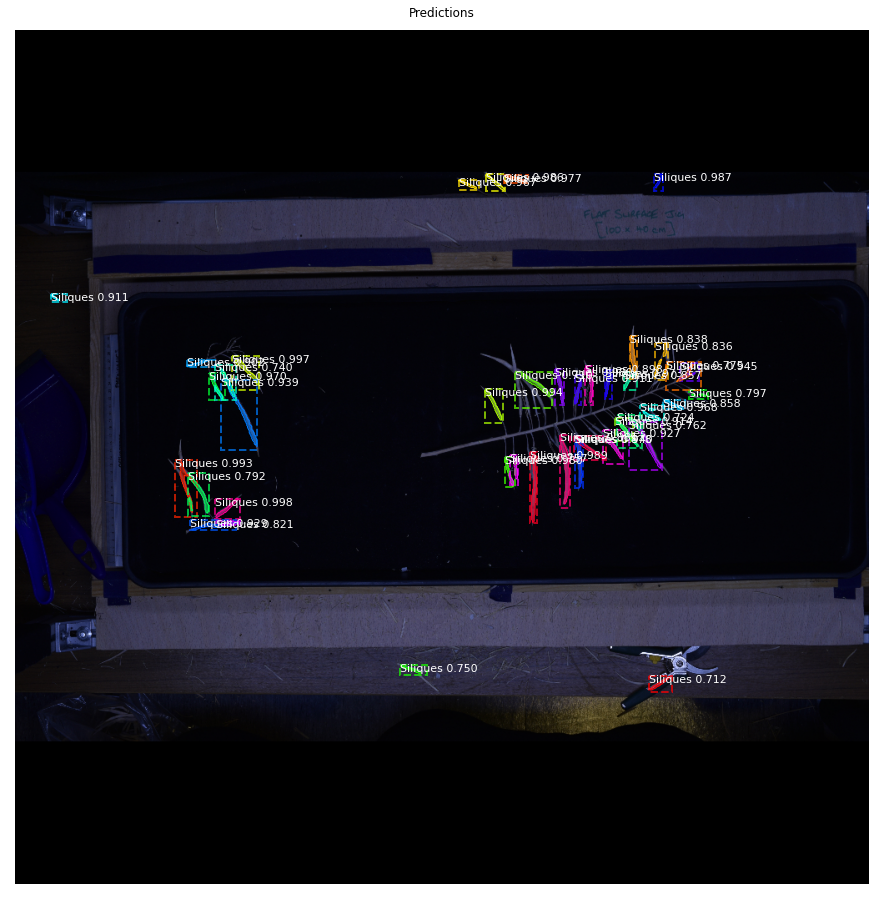

In [ ]:
# Testing images with annotation files
image_id = random.choice(dataset_val.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
info = dataset_val.image_info[image_id]

results = model.detect([image], verbose=1)

ax = get_ax(1)
r=post_SNMS(r=results[0], sigma=1, confMin=0.7)[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'],ax=ax, title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

###Precision-recall curve

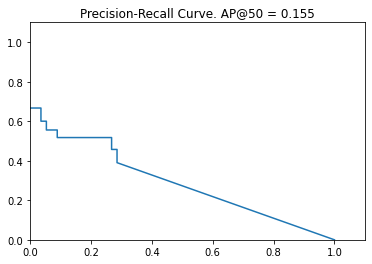

In [ ]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

###Grid of ground truth objects and their predictions

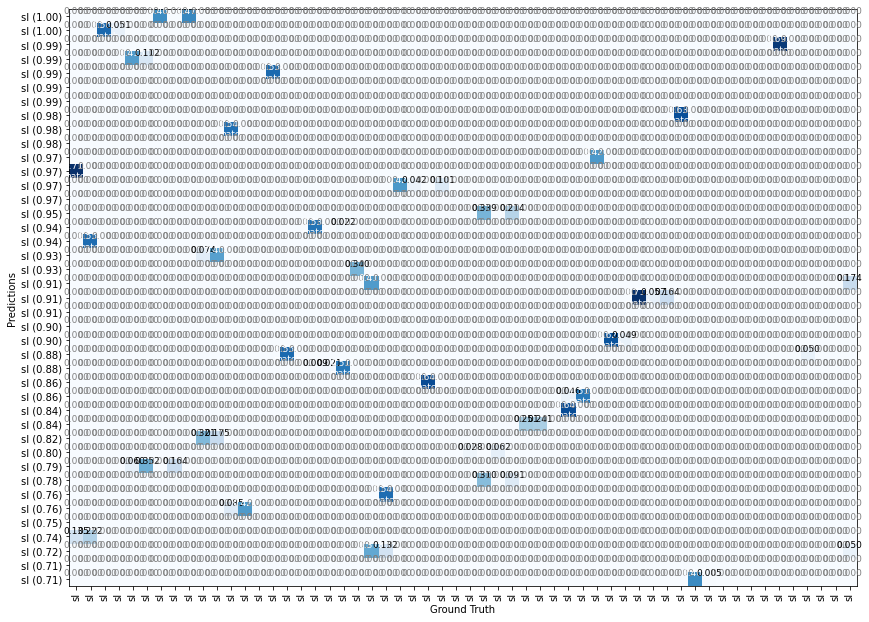

In [ ]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset_val022.class_names)

###Compute mAP @ IoU=50 on Batch of Images

In [ ]:
#Compute mAP @ IoU=50 on Batch of Images
# Compute VOC-style Average Precision
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        #image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
        image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val022, config, image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'])
        APs.append(AP)
    return APs

# Pick a set of random images
#image_ids = np.random.choice(dataset_val.image_ids, 10)
# Pick a set of random images
APs = compute_batch_ap(dataset_val022.image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

BR02-23911C-6.jpg
BR022-53012B-3A.jpg
BR022-209141-1.jpg
BR022-209145-3.jpg
BR022-209146-3B.jpg
BR022-238135-4.jpg
BR022-239112-4B.jpg
BR022-239116-6.jpg
BR022-510114-1.jpg
BR022-510139-M.jpg
BR022-530125-3.jpg
BR022-530128-3.jpg
BR022-530142-6.jpg
BR022-530145-1.jpg
BR022-532131-2.jpg
BR022-532132-8.jpg
BR022-532136-7.jpg
BR022-532138-6B.jpg
BR02253012A-3B.jpg
BR02253014C-5.jpg
mAP @ IoU=50:  0.39859701445136375


##II. Save and evaluate prediction of entire datasets

###1) Save validation images and its annotation

In [ ]:
#IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val")
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val_brasscia022")
display_annot(dataset_val, IMG_SAVE_DIR)
print("Save completed!")

BR02-23911C-6.jpg
(42, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


plantid:  BR02-23911C-6
BR022-53012B-3A.jpg
(31, 4)
plantid:  BR022-53012B-3A
BR022-209141-1.jpg
(105, 4)
plantid:  BR022-209141-1
BR022-209145-3.jpg
(32, 4)
plantid:  BR022-209145-3
BR022-209146-3B.jpg
(89, 4)
plantid:  BR022-209146-3B
BR022-238135-4.jpg
(63, 4)
plantid:  BR022-238135-4
BR022-239112-4B.jpg
(87, 4)
plantid:  BR022-239112-4B
BR022-239116-6.jpg
(66, 4)
plantid:  BR022-239116-6
BR022-510114-1.jpg
(22, 4)
plantid:  BR022-510114-1
BR022-510139-M.jpg
(28, 4)
plantid:  BR022-510139-M
BR022-530125-3.jpg
(51, 4)
plantid:  BR022-530125-3
BR022-530128-3.jpg
(56, 4)
plantid:  BR022-530128-3
BR022-530142-6.jpg
(21, 4)
plantid:  BR022-530142-6
BR022-530145-1.jpg
(11, 4)
plantid:  BR022-530145-1
BR022-532131-2.jpg
(48, 4)
plantid:  BR022-532131-2
BR022-532132-8.jpg
(50, 4)
plantid:  BR022-532132-8
BR022-532136-7.jpg
(39, 4)
plantid:  BR022-532136-7
BR022-532138-6B.jpg
(46, 4)
plantid:  BR022-532138-6B
BR02253012A-3B.jpg
(29, 4)
plantid:  BR02253012A-3B
BR02253014C-5.jpg
(24, 4)
plant

###2) Save validation images and its predicted annotation

In [ ]:
#IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val")
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val_brasscia022")
save_infer_images(dataset_val, IMG_SAVE_DIR,config=inference_config)
print("Save completed!")

Processing 1 images
image                    shape: (4000, 6000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 6000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32
0.Silique Counts(init): 98
(98,)
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
iou>0.5:  [0.52]
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 3
Run:  1  Remove!!n= 1
Run:  1  Remove!!n= 1
Run:  1 ; deltaMax:  0.313613
Run:  2  Remove!!n= 13
Run:  2  Remove!!n= 1
Run:  2  Remove!!n= 1
Run:  2  Remove!!n= 1
Run:  2  Remove!!n= 1
Run:  2 ; deltaMax:  0.14012167
ROI counts: 98
ROI counts(SNMS): 81
2.Silique Counts(combined SNMS): 81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 1, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR02-23911C-6.jpg', 'filename': 'BR02-23911C-6.jpg', 'count': 42, 'annotDF':              filename  file_size file_attributes  region_count  region_id  \
0   BR02-23911C-6.jpg    6767901              {}            42          0   
1   BR02-23911C-6.jpg    6767901              {}            42          1   
2   BR02-23911C-6.jpg    6767901              {}            42          2   
3   BR02-23911C-6.jpg    6767901              {}            42          3   
4   BR02-23911C-6.jpg    6767901              {}            42          4   
5   BR02-23911C-6.jpg    6767901              {}            42          5   
6   BR02-23911C-6.jpg    6767901              {}            42          6   
7   BR02-23911C-6.jpg    6767901              {}            42          7   
8   BR02-23911C-6.jpg    6767901              {}            42          8   
9   BR02-23911C-6.jpg    6767901              {

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 2, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-53012B-3A.jpg', 'filename': 'BR022-53012B-3A.jpg', 'count': 31, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
42  BR022-53012B-3A.jpg    7558409              {}            31          0   
43  BR022-53012B-3A.jpg    7558409              {}            31          1   
44  BR022-53012B-3A.jpg    7558409              {}            31          2   
45  BR022-53012B-3A.jpg    7558409              {}            31          3   
46  BR022-53012B-3A.jpg    7558409              {}            31          4   
47  BR022-53012B-3A.jpg    7558409              {}            31          5   
48  BR022-53012B-3A.jpg    7558409              {}            31          6   
49  BR022-53012B-3A.jpg    7558409              {}            31          7   
50  BR022-53012B-3A.jpg    7558409              {}            31          8   
51  BR022-53012B-3A.jpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 3, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-209141-1.jpg', 'filename': 'BR022-209141-1.jpg', 'count': 105, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
73   BR022-209141-1.jpg    6824793              {}           105          0   
74   BR022-209141-1.jpg    6824793              {}           105          1   
75   BR022-209141-1.jpg    6824793              {}           105          2   
76   BR022-209141-1.jpg    6824793              {}           105          3   
77   BR022-209141-1.jpg    6824793              {}           105          4   
..                  ...        ...             ...           ...        ...   
173  BR022-209141-1.jpg    6824793              {}           105        100   
174  BR022-209141-1.jpg    6824793              {}           105        101   
175  BR022-209141-1.jpg    6824793              {}           105        102   
176  BR022-209141-1.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 4, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-209145-3.jpg', 'filename': 'BR022-209145-3.jpg', 'count': 32, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
178  BR022-209145-3.jpg    6525555              {}            32          0   
179  BR022-209145-3.jpg    6525555              {}            32          1   
180  BR022-209145-3.jpg    6525555              {}            32          2   
181  BR022-209145-3.jpg    6525555              {}            32          3   
182  BR022-209145-3.jpg    6525555              {}            32          4   
183  BR022-209145-3.jpg    6525555              {}            32          5   
184  BR022-209145-3.jpg    6525555              {}            32          6   
185  BR022-209145-3.jpg    6525555              {}            32          7   
186  BR022-209145-3.jpg    6525555              {}            32          8   
187  BR022-209145-3.jpg  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 5, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-209146-3B.jpg', 'filename': 'BR022-209146-3B.jpg', 'count': 89, 'annotDF':                 filename  file_size file_attributes  region_count  region_id  \
210  BR022-209146-3B.jpg    6899138              {}            89          0   
211  BR022-209146-3B.jpg    6899138              {}            89          1   
212  BR022-209146-3B.jpg    6899138              {}            89          2   
213  BR022-209146-3B.jpg    6899138              {}            89          3   
214  BR022-209146-3B.jpg    6899138              {}            89          4   
..                   ...        ...             ...           ...        ...   
294  BR022-209146-3B.jpg    6899138              {}            89         84   
295  BR022-209146-3B.jpg    6899138              {}            89         85   
296  BR022-209146-3B.jpg    6899138              {}            89         86   
297  BR022-20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 6, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-238135-4.jpg', 'filename': 'BR022-238135-4.jpg', 'count': 63, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
299  BR022-238135-4.jpg    6859904              {}            63          0   
300  BR022-238135-4.jpg    6859904              {}            63          1   
301  BR022-238135-4.jpg    6859904              {}            63          2   
302  BR022-238135-4.jpg    6859904              {}            63          3   
303  BR022-238135-4.jpg    6859904              {}            63          4   
..                  ...        ...             ...           ...        ...   
357  BR022-238135-4.jpg    6859904              {}            63         58   
358  BR022-238135-4.jpg    6859904              {}            63         59   
359  BR022-238135-4.jpg    6859904              {}            63         60   
360  BR022-238135-4.jpg  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


empty mask!
{'id': 7, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-239112-4B.jpg', 'filename': 'BR022-239112-4B.jpg', 'count': 87, 'annotDF':                 filename  file_size file_attributes  region_count  region_id  \
362  BR022-239112-4B.jpg    8103908              {}            87          0   
363  BR022-239112-4B.jpg    8103908              {}            87          1   
364  BR022-239112-4B.jpg    8103908              {}            87          2   
365  BR022-239112-4B.jpg    8103908              {}            87          3   
366  BR022-239112-4B.jpg    8103908              {}            87          4   
..                   ...        ...             ...           ...        ...   
444  BR022-239112-4B.jpg    8103908              {}            87         82   
445  BR022-239112-4B.jpg    8103908              {}            87         83   
446  BR022-239112-4B.jpg    8103908              {}            87         84   
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


empty mask!
{'id': 8, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-239116-6.jpg', 'filename': 'BR022-239116-6.jpg', 'count': 66, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
449  BR022-239116-6.jpg    6807812              {}            66          0   
450  BR022-239116-6.jpg    6807812              {}            66          1   
451  BR022-239116-6.jpg    6807812              {}            66          2   
452  BR022-239116-6.jpg    6807812              {}            66          3   
453  BR022-239116-6.jpg    6807812              {}            66          4   
..                  ...        ...             ...           ...        ...   
510  BR022-239116-6.jpg    6807812              {}            66         61   
511  BR022-239116-6.jpg    6807812              {}            66         62   
512  BR022-239116-6.jpg    6807812              {}            66         63   
513  BR022-23

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 9, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-510114-1.jpg', 'filename': 'BR022-510114-1.jpg', 'count': 22, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
515  BR022-510114-1.jpg    6713064              {}            22          0   
516  BR022-510114-1.jpg    6713064              {}            22          1   
517  BR022-510114-1.jpg    6713064              {}            22          2   
518  BR022-510114-1.jpg    6713064              {}            22          3   
519  BR022-510114-1.jpg    6713064              {}            22          4   
520  BR022-510114-1.jpg    6713064              {}            22          5   
521  BR022-510114-1.jpg    6713064              {}            22          6   
522  BR022-510114-1.jpg    6713064              {}            22          7   
523  BR022-510114-1.jpg    6713064              {}            22          8   
524  BR022-510114-1.jpg  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 10, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-510139-M.jpg', 'filename': 'BR022-510139-M.jpg', 'count': 28, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
537  BR022-510139-M.jpg    6763287              {}            28          0   
538  BR022-510139-M.jpg    6763287              {}            28          1   
539  BR022-510139-M.jpg    6763287              {}            28          2   
540  BR022-510139-M.jpg    6763287              {}            28          3   
541  BR022-510139-M.jpg    6763287              {}            28          4   
542  BR022-510139-M.jpg    6763287              {}            28          5   
543  BR022-510139-M.jpg    6763287              {}            28          6   
544  BR022-510139-M.jpg    6763287              {}            28          7   
545  BR022-510139-M.jpg    6763287              {}            28          8   
546  BR022-510139-M.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 11, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-530125-3.jpg', 'filename': 'BR022-530125-3.jpg', 'count': 51, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
565  BR022-530125-3.jpg    6816506              {}            51          0   
566  BR022-530125-3.jpg    6816506              {}            51          1   
567  BR022-530125-3.jpg    6816506              {}            51          2   
568  BR022-530125-3.jpg    6816506              {}            51          3   
569  BR022-530125-3.jpg    6816506              {}            51          4   
570  BR022-530125-3.jpg    6816506              {}            51          5   
571  BR022-530125-3.jpg    6816506              {}            51          6   
572  BR022-530125-3.jpg    6816506              {}            51          7   
573  BR022-530125-3.jpg    6816506              {}            51          8   
574  BR022-530125-3.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 12, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-530128-3.jpg', 'filename': 'BR022-530128-3.jpg', 'count': 56, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
616  BR022-530128-3.jpg    6867194              {}            56          0   
617  BR022-530128-3.jpg    6867194              {}            56          1   
618  BR022-530128-3.jpg    6867194              {}            56          2   
619  BR022-530128-3.jpg    6867194              {}            56          3   
620  BR022-530128-3.jpg    6867194              {}            56          4   
621  BR022-530128-3.jpg    6867194              {}            56          5   
622  BR022-530128-3.jpg    6867194              {}            56          6   
623  BR022-530128-3.jpg    6867194              {}            56          7   
624  BR022-530128-3.jpg    6867194              {}            56          8   
625  BR022-530128-3.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 13, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-530142-6.jpg', 'filename': 'BR022-530142-6.jpg', 'count': 21, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
672  BR022-530142-6.jpg    6870385              {}            21          0   
673  BR022-530142-6.jpg    6870385              {}            21          1   
674  BR022-530142-6.jpg    6870385              {}            21          2   
675  BR022-530142-6.jpg    6870385              {}            21          3   
676  BR022-530142-6.jpg    6870385              {}            21          4   
677  BR022-530142-6.jpg    6870385              {}            21          5   
678  BR022-530142-6.jpg    6870385              {}            21          6   
679  BR022-530142-6.jpg    6870385              {}            21          7   
680  BR022-530142-6.jpg    6870385              {}            21          8   
681  BR022-530142-6.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 14, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-530145-1.jpg', 'filename': 'BR022-530145-1.jpg', 'count': 11, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
693  BR022-530145-1.jpg    7302682              {}            11          0   
694  BR022-530145-1.jpg    7302682              {}            11          1   
695  BR022-530145-1.jpg    7302682              {}            11          2   
696  BR022-530145-1.jpg    7302682              {}            11          3   
697  BR022-530145-1.jpg    7302682              {}            11          4   
698  BR022-530145-1.jpg    7302682              {}            11          5   
699  BR022-530145-1.jpg    7302682              {}            11          6   
700  BR022-530145-1.jpg    7302682              {}            11          7   
701  BR022-530145-1.jpg    7302682              {}            11          8   
702  BR022-530145-1.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 15, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-532131-2.jpg', 'filename': 'BR022-532131-2.jpg', 'count': 48, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
704  BR022-532131-2.jpg    6892445              {}            48          0   
705  BR022-532131-2.jpg    6892445              {}            48          1   
706  BR022-532131-2.jpg    6892445              {}            48          2   
707  BR022-532131-2.jpg    6892445              {}            48          3   
708  BR022-532131-2.jpg    6892445              {}            48          4   
709  BR022-532131-2.jpg    6892445              {}            48          5   
710  BR022-532131-2.jpg    6892445              {}            48          6   
711  BR022-532131-2.jpg    6892445              {}            48          7   
712  BR022-532131-2.jpg    6892445              {}            48          8   
713  BR022-532131-2.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 16, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-532132-8.jpg', 'filename': 'BR022-532132-8.jpg', 'count': 50, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
752  BR022-532132-8.jpg    6509706              {}            50          0   
753  BR022-532132-8.jpg    6509706              {}            50          1   
754  BR022-532132-8.jpg    6509706              {}            50          2   
755  BR022-532132-8.jpg    6509706              {}            50          3   
756  BR022-532132-8.jpg    6509706              {}            50          4   
757  BR022-532132-8.jpg    6509706              {}            50          5   
758  BR022-532132-8.jpg    6509706              {}            50          6   
759  BR022-532132-8.jpg    6509706              {}            50          7   
760  BR022-532132-8.jpg    6509706              {}            50          8   
761  BR022-532132-8.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 17, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-532136-7.jpg', 'filename': 'BR022-532136-7.jpg', 'count': 39, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
802  BR022-532136-7.jpg    6703779              {}            39          0   
803  BR022-532136-7.jpg    6703779              {}            39          1   
804  BR022-532136-7.jpg    6703779              {}            39          2   
805  BR022-532136-7.jpg    6703779              {}            39          3   
806  BR022-532136-7.jpg    6703779              {}            39          4   
807  BR022-532136-7.jpg    6703779              {}            39          5   
808  BR022-532136-7.jpg    6703779              {}            39          6   
809  BR022-532136-7.jpg    6703779              {}            39          7   
810  BR022-532136-7.jpg    6703779              {}            39          8   
811  BR022-532136-7.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 18, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR022-532138-6B.jpg', 'filename': 'BR022-532138-6B.jpg', 'count': 46, 'annotDF':                 filename  file_size file_attributes  region_count  region_id  \
841  BR022-532138-6B.jpg    6794367              {}            46          0   
842  BR022-532138-6B.jpg    6794367              {}            46          1   
843  BR022-532138-6B.jpg    6794367              {}            46          2   
844  BR022-532138-6B.jpg    6794367              {}            46          3   
845  BR022-532138-6B.jpg    6794367              {}            46          4   
846  BR022-532138-6B.jpg    6794367              {}            46          5   
847  BR022-532138-6B.jpg    6794367              {}            46          6   
848  BR022-532138-6B.jpg    6794367              {}            46          7   
849  BR022-532138-6B.jpg    6794367              {}            46          8   
850  BR022-5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 19, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR02253012A-3B.jpg', 'filename': 'BR02253012A-3B.jpg', 'count': 29, 'annotDF':                filename  file_size file_attributes  region_count  region_id  \
887  BR02253012A-3B.jpg    7155267              {}            29          0   
888  BR02253012A-3B.jpg    7155267              {}            29          1   
889  BR02253012A-3B.jpg    7155267              {}            29          2   
890  BR02253012A-3B.jpg    7155267              {}            29          3   
891  BR02253012A-3B.jpg    7155267              {}            29          4   
892  BR02253012A-3B.jpg    7155267              {}            29          5   
893  BR02253012A-3B.jpg    7155267              {}            29          6   
894  BR02253012A-3B.jpg    7155267              {}            29          7   
895  BR02253012A-3B.jpg    7155267              {}            29          8   
896  BR02253012A-3B.jpg 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


{'id': 20, 'source': 'brassica', 'path': '/content/drive/MyDrive/Detection/Brassica/Val_images_brassica022/BR02253014C-5.jpg', 'filename': 'BR02253014C-5.jpg', 'count': 24, 'annotDF':               filename  file_size file_attributes  region_count  region_id  \
916  BR02253014C-5.jpg    6951429              {}            24          0   
917  BR02253014C-5.jpg    6951429              {}            24          1   
918  BR02253014C-5.jpg    6951429              {}            24          2   
919  BR02253014C-5.jpg    6951429              {}            24          3   
920  BR02253014C-5.jpg    6951429              {}            24          4   
921  BR02253014C-5.jpg    6951429              {}            24          5   
922  BR02253014C-5.jpg    6951429              {}            24          6   
923  BR02253014C-5.jpg    6951429              {}            24          7   
924  BR02253014C-5.jpg    6951429              {}            24          8   
925  BR02253014C-5.jpg    6951429   

###3) Save as CSV file for prediction

In [ ]:
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_CSV022")
save_infer_CSV(dataset_val, IMG_SAVE_DIR,config=inference_config)
print("Done!")

Processing 1 images
image                    shape: (4000, 6000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 6000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32
(68,)
Run:  1 ; deltaMax:  0.313613
Run:  2  Remove!!n= 1
Run:  2  Remove!!n= 1
Run:  2 ; deltaMax:  0.20287791
Run:  3  Remove!!n= 2
Run:  3  Remove!!n= 1
Run:  3 ; deltaMax:  0.10965508
ROI counts: 68
ROI counts(SNMS): 65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


         image_names                                               rois  \
0  BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              scores  
0  [0.9992777705192566, 0.9978173971176147, 0.997...  
Processing 1 images
image                    shape: (4000, 6000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 6000.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32
(32,)
Run:  1 ; deltaMax:  0.24230999
Run:  2  Remove!!n= 1
Run:  2 ; deltaMax:  0.1696051
ROI counts: 32
ROI c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              scores  
0  [0.9992777705192566, 0.9978173971176147, 0.997...  
1  [0.9974259734153748, 0.9970008730888367, 0.996...  
Processing 1 images
image                    shape: (4000, 6000, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              scores  
0  [0.9992777705192566, 0.9978173971176147, 0.997...  
1  [0.9974259734153748, 0.9970008730888367, 0.996...  
2  [0.9985987544059753, 0.9984297156333923, 0.998...  
Processing 1 images
i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[[False, False, False, False, False, False, F...   
4  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5   BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[[False, False, False, False, False, False, F...   
4  [[[False, False, False, False, False, False, F...   
5  [[[False, False, False, False, False, False, F...   

                                           class_ids  \
0  [1, 1, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5   BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6  BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[[False, False, False, False, False, False, F...   
4  [[[False, False, False, False, False, False, F...   
5  [[[False, False, False, False, False, False,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5   BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6  BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7   BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[[False, False, False, False, False, False, F...   
4  [[[False, False, False,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5   BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6  BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7   BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8   BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False, False, F...   
2  [[[False, False, False, False, False, False, F...   
3  [[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


           image_names                                               rois  \
0    BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1  BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2   BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3   BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4  BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5   BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6  BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7   BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8   BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9   BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   

                                               masks  \
0  [[[False, False, False, False, False, False, F...   
1  [[[False, False, False, False, False,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   

                                                masks  \
0   [[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


            image_names                                               rois  \
0     BR02-23911C-6.jpg  [[2016, 1546, 2190, 1708], [2337, 3810, 2468, ...   
1   BR022-53012B-3A.jpg  [[1150, 4014, 1423, 4276], [1646, 3626, 1952, ...   
2    BR022-209141-1.jpg  [[1552, 2296, 1714, 2398], [1635, 1854, 1795, ...   
3    BR022-209145-3.jpg  [[1780, 3297, 2054, 3388], [1666, 1789, 1769, ...   
4   BR022-209146-3B.jpg  [[1452, 1094, 1649, 1317], [2279, 3050, 2554, ...   
5    BR022-238135-4.jpg  [[1570, 2201, 1830, 2349], [1976, 4488, 2133, ...   
6   BR022-239112-4B.jpg  [[1915, 2569, 2112, 2666], [963, 1415, 1106, 1...   
7    BR022-239116-6.jpg  [[2556, 3945, 2725, 4106], [1075, 2074, 1193, ...   
8    BR022-510114-1.jpg  [[2082, 3046, 2268, 3121], [1631, 3115, 1801, ...   
9    BR022-510139-M.jpg  [[1561, 4143, 1884, 4249], [1957, 4826, 2157, ...   
10   BR022-530125-3.jpg  [[1756, 1471, 2137, 1605], [2054, 3169, 2300, ...   
11   BR022-530128-3.jpg  [[2291, 1402, 2428, 1573], [1289, 1527,

###4) Save as pkl file for prediction

In [ ]:
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_pkl_brasscia022")
save_infer_pkl(dataset_val, IMG_SAVE_DIR,config=inference_config)

###5) Visualization for Evaluation 

####Brassica017 images

In [ ]:
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val")
def visualize_pre_val(IMG_SAVE_DIR):
  #IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val")
  arr_val=np.array([])
  arr_pre=np.array([])
  for filename in os.listdir(IMG_SAVE_DIR):
  
    if filename[-7:-4]=="Val":
      arr_val=np.append(arr_val,filename)

    if filename[-7:-4]=="Pre":
      arr_pre=np.append(arr_pre,filename)

  zipped= zip(arr_val, arr_pre)

  for val, pre in zipped:
          img1=imread(os.path.join(IMG_SAVE_DIR,val))
          img2=imread(os.path.join(IMG_SAVE_DIR,pre))
          plt.figure(figsize=(28, 10))
          plt.subplot(1, 2, 1)
          plt.title('{} validation visualization'.format(val))
          plt.imshow(img1)
          plt.axis('off')
          plt.subplot(1, 2, 2)
          plt.title('{} prediction visualiztion'.format(pre))
          plt.imshow(img2)
          plt.axis('off')
          

Output hidden; open in https://colab.research.google.com to view.

####Brassica022 images

In [ ]:
IMG_SAVE_DIR=os.path.join(BRASSICA_DIR,"Save_pre_val_brasscia022")
def visualize_pre_val(IMG_SAVE_DIR):
  arr_val=np.array([])
  arr_pre=np.array([])
  for filename in os.listdir(IMG_SAVE_DIR):
  
    if filename[-7:-4]=="Val":
      arr_val=np.append(arr_val,filename)

    if filename[-7:-4]=="Pre":
      arr_pre=np.append(arr_pre,filename)

  zipped= zip(arr_val, arr_pre)

  for val, pre in zipped:
          img1=imread(os.path.join(IMG_SAVE_DIR,val))
          img2=imread(os.path.join(IMG_SAVE_DIR,pre))
          plt.figure(figsize=(28, 10))
          plt.subplot(1, 2, 1)
          plt.title('{} validation visualization'.format(val))
          plt.imshow(img1)
          plt.axis('off')
          plt.subplot(1, 2, 2)
          plt.title('{} prediction visualiztion'.format(pre))
          plt.imshow(img2)
          plt.axis('off')
        

Output hidden; open in https://colab.research.google.com to view.

#(20) Evaluation by analysing the features of siliques collected from prediction

##I. Get data from correct fold saving data of a dataset prediction

In [ ]:
PREDICTION_DIR=os.path.join(BRASSICA_DIR,"Save_pre_pkl")

In [ ]:
PREDICTION_DIR_BR022=os.path.join(BRASSICA_DIR,"Save_pre_pkl_brasscia022")

##II. Collect and organise data from validation and perdiction

In [ ]:

def count_number_siliques(dataset, PREDICTION_DIR):
    total_pre_boxes=0
    total_val_boxes=0
    count_dict = dict()
    filenames=os.listdir(PREDICTION_DIR)
    val="validation"
    pre="prediction"
    

    image_ids = range(len(dataset.image_info))
    for image_id in image_ids:
      plantid = dataset.image_info[image_id]['filename'].replace('.jpg', '')
      name = str(image_id) + '-' + plantid + '-SiliquePre' + '.jpg' + '.pkl'
      #boxes,class_ids=dataset.load_bbox(image_id)
      #n_instances = boxes.shape[0]
     
      for filename in filenames:
        if name==filename:
          if 'image_names' in count_dict:
            count_dict['image_names'].append(plantid)
          else:
            count_dict['image_names']=[plantid] 
          
          boxes, class_ids = dataset.load_bbox(image_id)
          total_val_boxes+=boxes.shape[0]
          #print('{} validation has boxes {} '.format(plantid, boxes.shape[0]))  
          if 'validation_counts' in count_dict:
            count_dict['validation_counts'].append(boxes.shape[0])  
          else:
            count_dict['validation_counts']=[boxes.shape[0]]       
          
          average_length=0
          length_of_total=0
          arr=np.empty([0])
          for i in range(boxes.shape[0]): 
            y1, x1, y2, x2 = boxes[i]
            silique_length_val=math.sqrt((y1-y2)**2 +(x1-x2)**2)
            arr=np.append(arr, round(silique_length_val,2))
            length_of_total+=silique_length_val
            #print('the {} silique of validation has length {:.2f}'.format(i+1, silique_length_val)) 
         
          if 'all_length_perimage_val' in count_dict:
            count_dict['all_length_perimage_val'].append(arr)  
          else:
            count_dict['all_length_perimage_val']=[arr] 

          average_length=length_of_total/boxes.shape[0]
          #print('the {} image of validation has avarage length {:.2f}'.format(plantid, average_length))
          if 'avlength_perimage_validation' in count_dict:
            count_dict['avlength_perimage_validation'].append(int(average_length))  
          else:
            count_dict['avlength_perimage_validation']=[int(average_length)]            
             




         
          r = load_obj(os.path.join(PREDICTION_DIR, filename[:-4]))
          total_pre_boxes+=len(r['rois'])
          #print('prediction has boxes {} '.format(total_pre_boxes))  
          #print('{} prediction has boxes {} '.format(plantid, len(r['rois'])))
         
          if 'prediction_counts' in count_dict:
            count_dict['prediction_counts'].append(len(r['rois']))  
          else:
            count_dict['prediction_counts']=[len(r['rois'])]       
          
          total_pre_boxes+=len(r['rois'])
          count_dict['total_pre_boxes']=total_pre_boxes
          length_of_total=0

          length_of_total=0
          average_length=0
          arr=np.empty([0])
          for i in range(len(r['rois'])):
            y1, x1, y2, x2 = r['rois'][i]
            silique_length_pre=math.sqrt((y1-y2)**2 +(x1-x2)**2)
            arr=np.append(arr, round(silique_length_pre,2))
            length_of_total+=silique_length_pre
            #print('the {} silique of prediction has length {:.2f}'.format(i+1, silique_length_pre))   

          if 'all_length_perimage_pre' in count_dict:
            count_dict['all_length_perimage_pre'].append(arr)  
          else:
            count_dict['all_length_perimage_pre']=[arr] 

          average_length=length_of_total/len(r['rois'])
          if 'avlength_perimage_prediction' in count_dict:
            count_dict['avlength_perimage_prediction'].append(int(average_length))  
          else:
            count_dict['avlength_perimage_prediction']=[int(average_length)]       
          #print('the {} image of prediction has avarage length {:.2f}'.format(plantid, average_length))
          
    count_dict['total_val_boxes']=total_val_boxes
    count_dict['total_pre_boxes']=total_pre_boxes
    
    return count_dict


      

#data=count_number_siliques(dataset_val, PREDICTION_DIR)
data=count_number_siliques(dataset_val022, PREDICTION_DIR_BR022)

##III.  Scatter chart, regression line, and R-square for the length of siliques per image

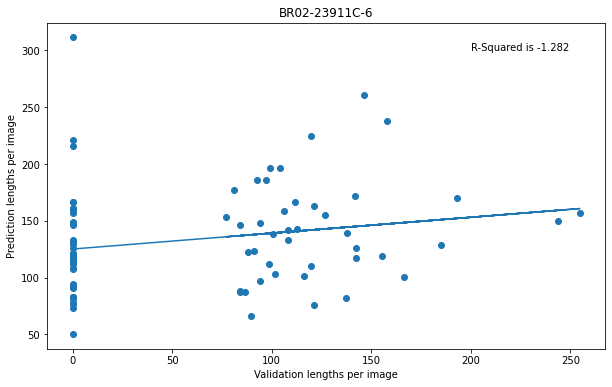

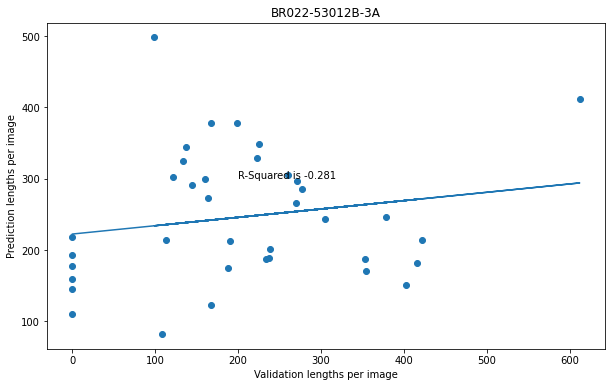

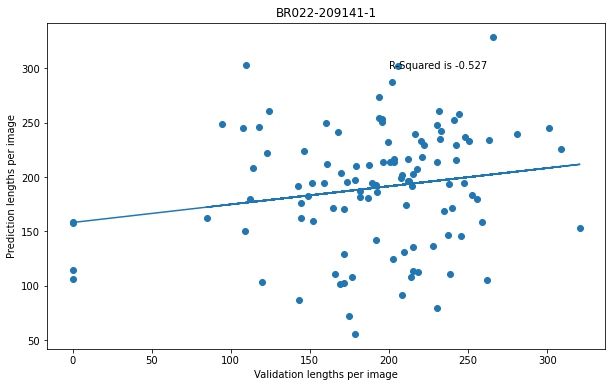

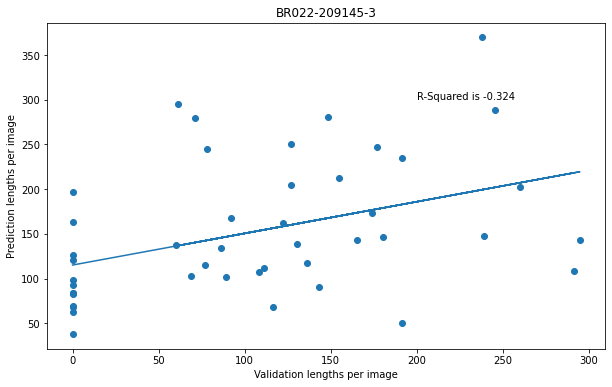

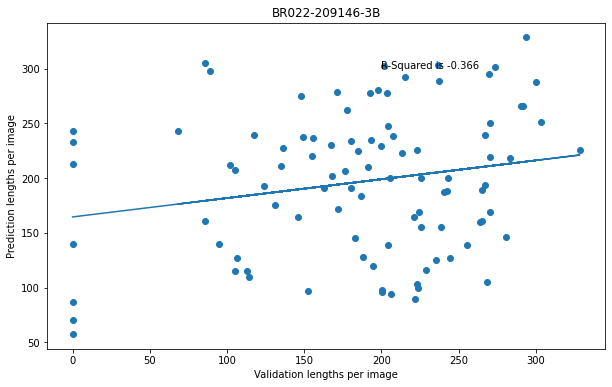

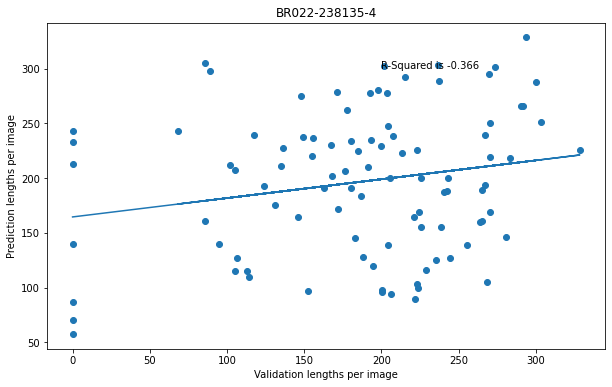

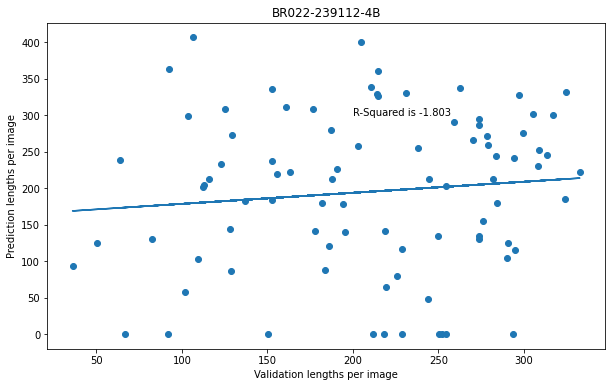

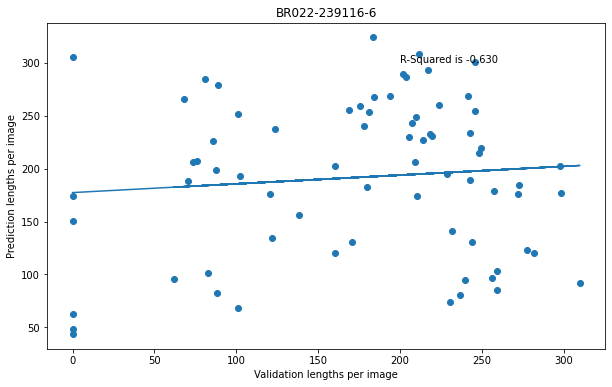

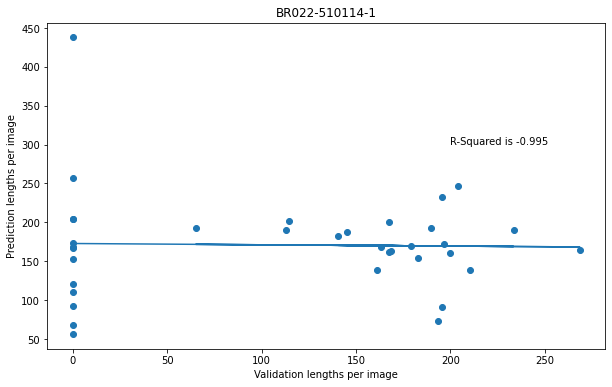

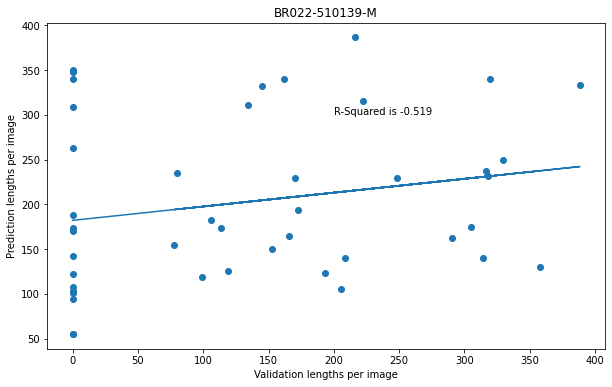

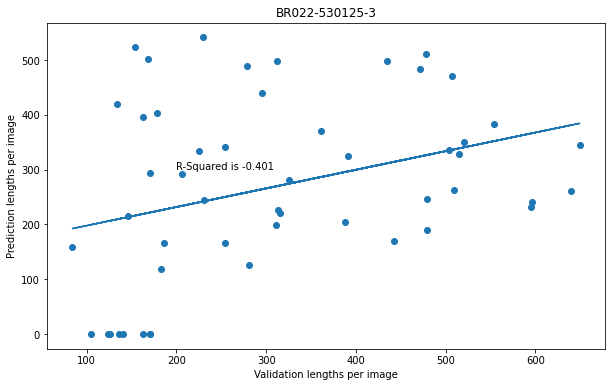

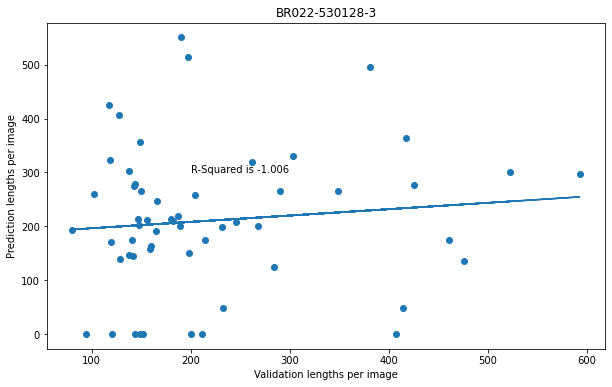

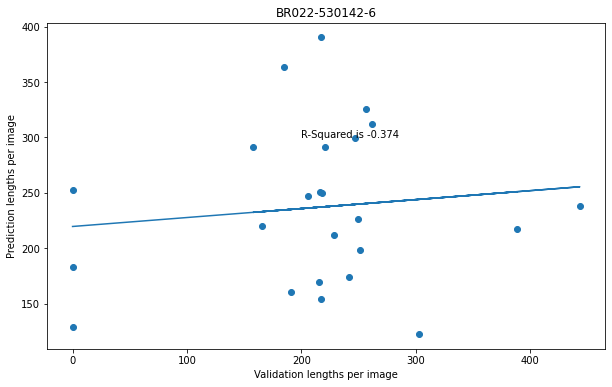

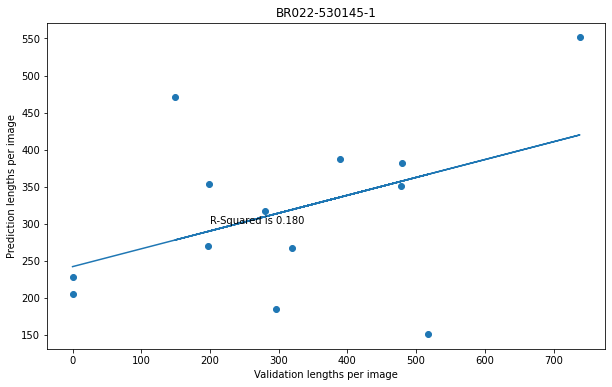

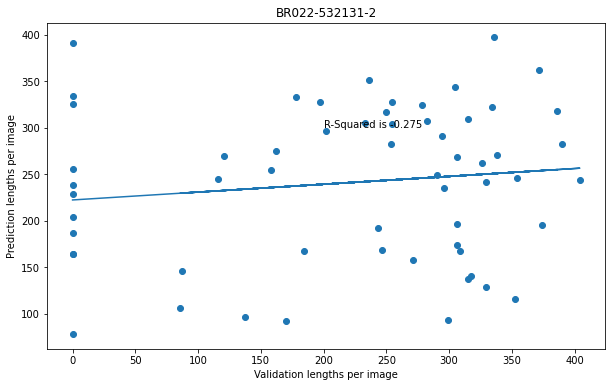

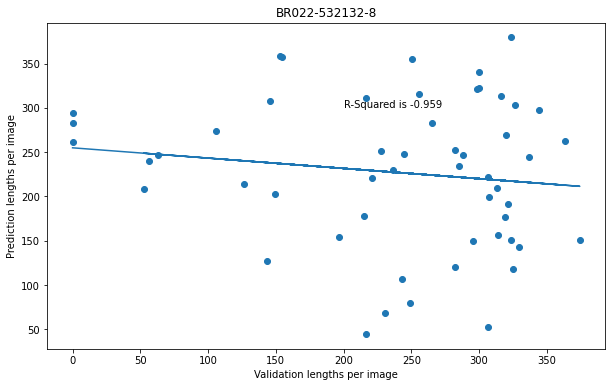

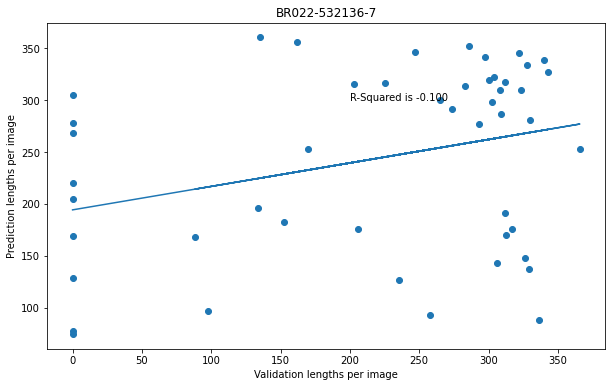

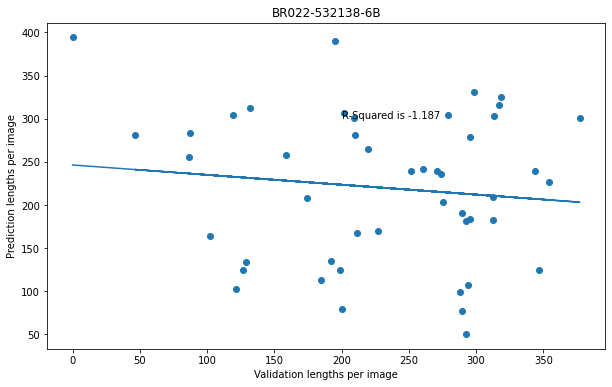

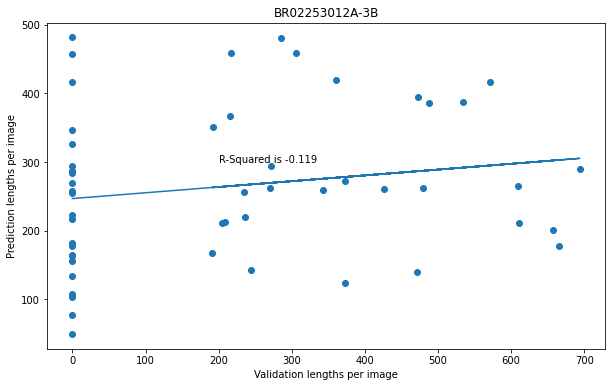

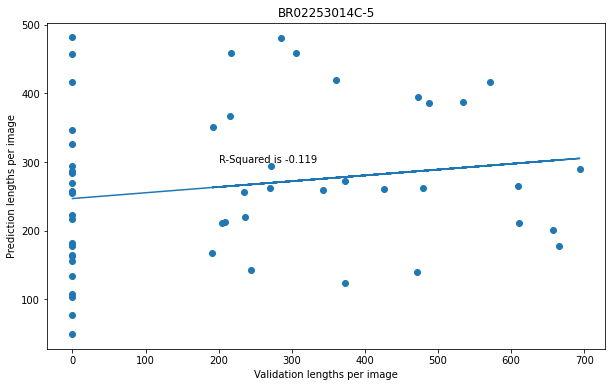

In [ ]:
def scartter_regression_Rsquare(data):
  for i in range(len(data['image_names'])):
    diff=len(data['all_length_perimage_val'][i])-len(data['all_length_perimage_pre'][i])
    if diff > 0:
      xx =data['all_length_perimage_val'][i]
      yy =np.append(data['all_length_perimage_pre'][i], np.zeros(diff))
    if diff < 0:
      xx = np.append(data['all_length_perimage_val'][i],np.zeros(abs(diff)))
      yy =data['all_length_perimage_pre'][i]
    fig, ax = plt.subplots(figsize=(10, 6))
    xx = xx.reshape((len(xx), 1))
    yy = yy.reshape((len(yy), 1))


    plt.annotate("R-Squared is {:.3f}".format(r2_score(xx, yy)), (200, 300))
    ax.set_title(data['image_names'][i])
    ax.set_xlabel('Validation lengths per image')
    ax.set_ylabel('Prediction lengths per image')
  

    ax.scatter(xx, yy)
    ax.plot(xx, LinearRegression().fit(xx, yy).predict(xx))

    plt.show()

##IV.  Line chars for comparing the length of siliques for per image against validation data and prediction data

###Brassica017 images

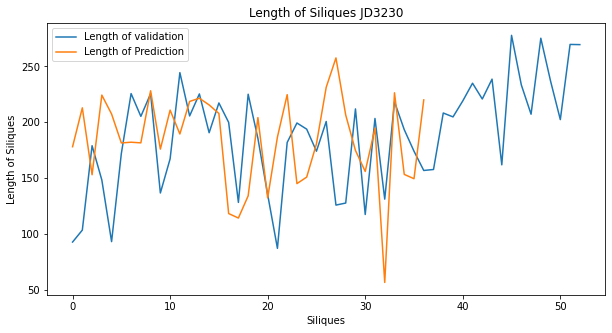

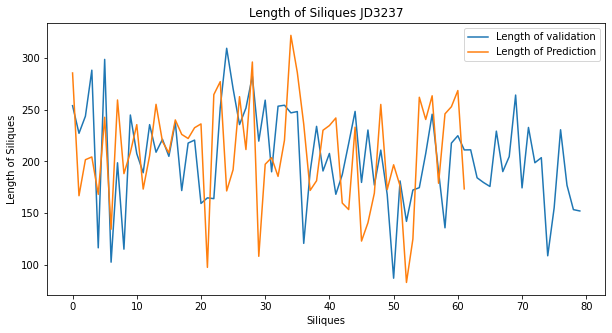

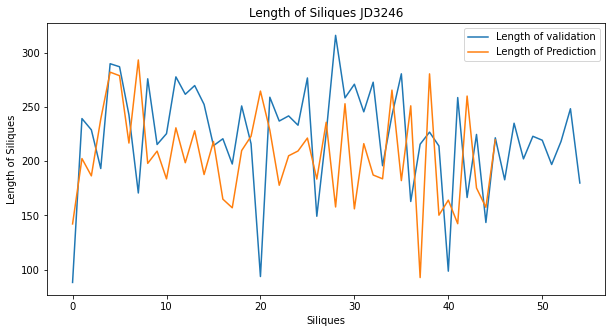

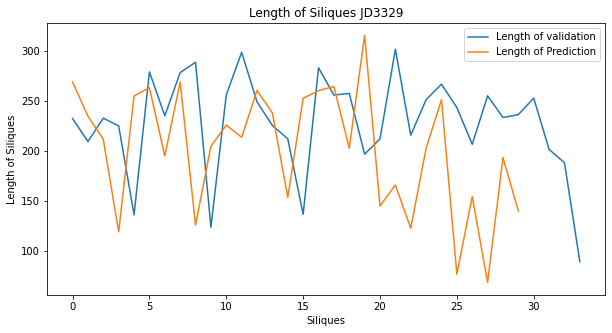

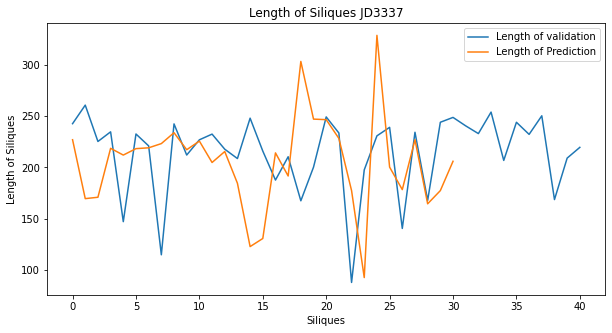

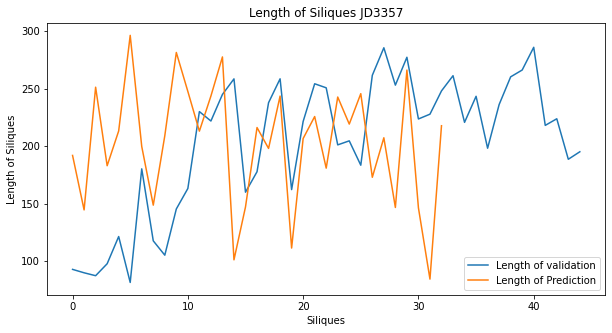

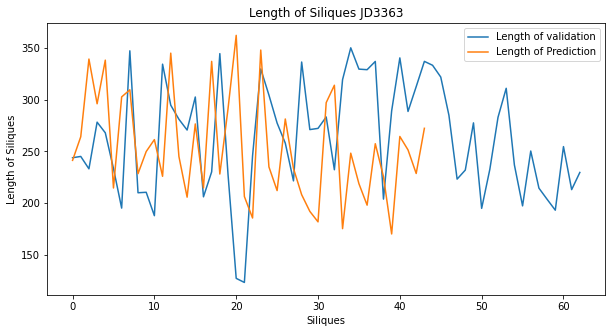

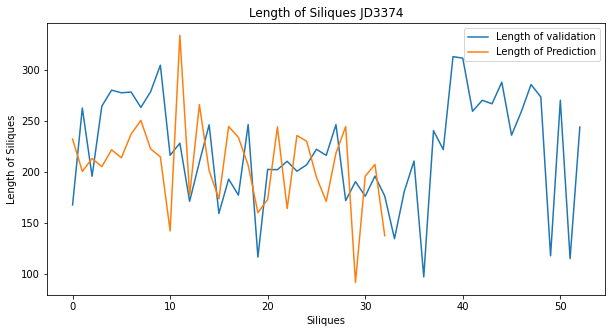

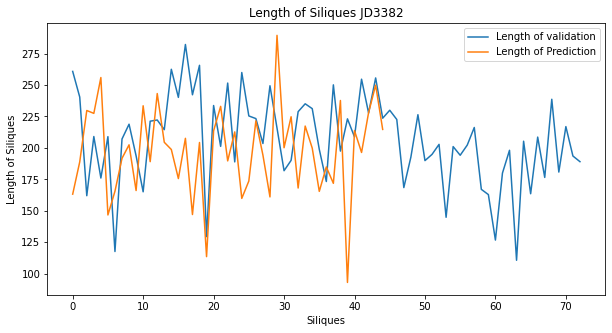

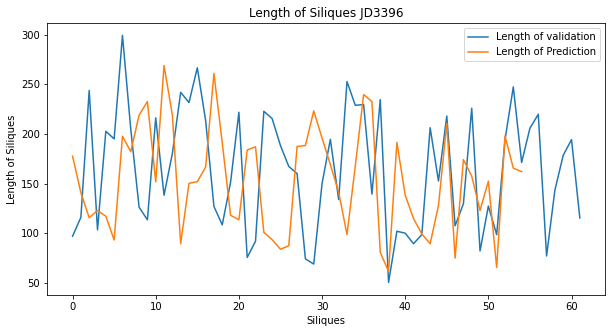

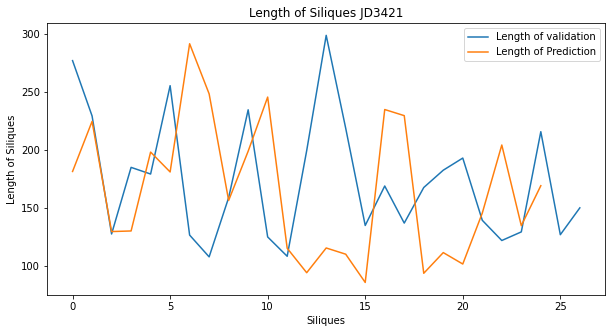

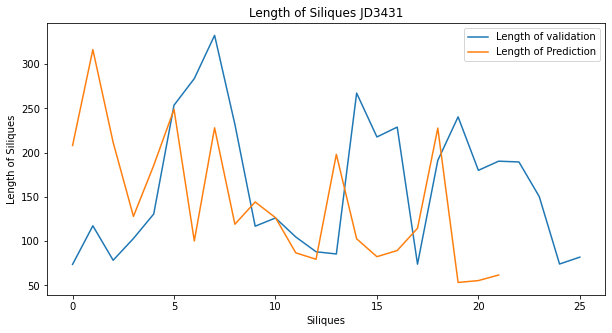

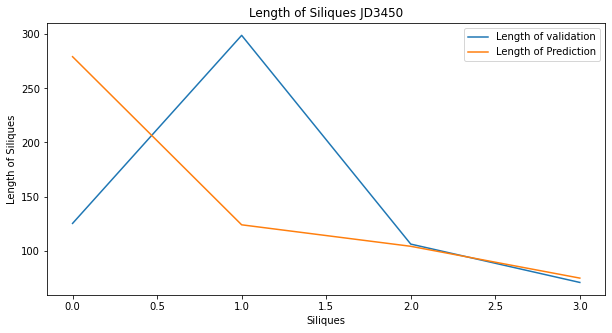

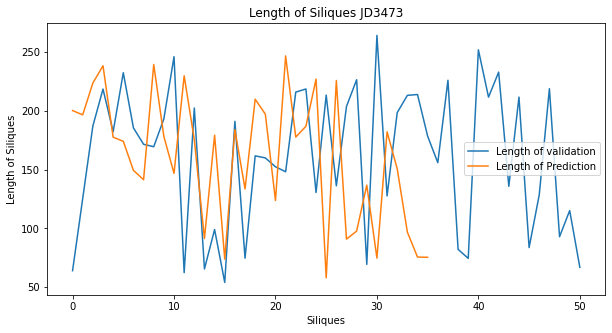

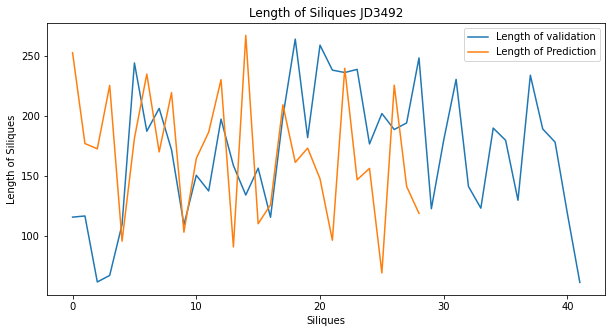

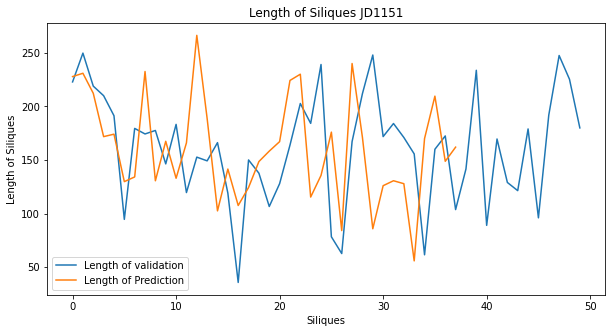

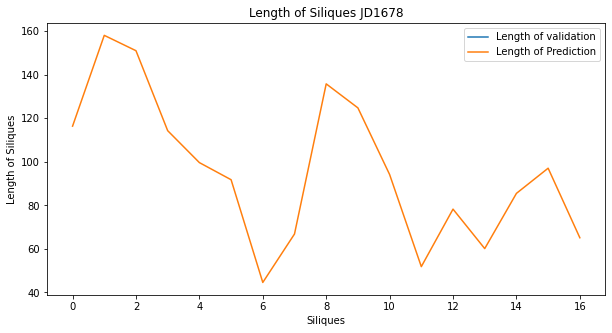

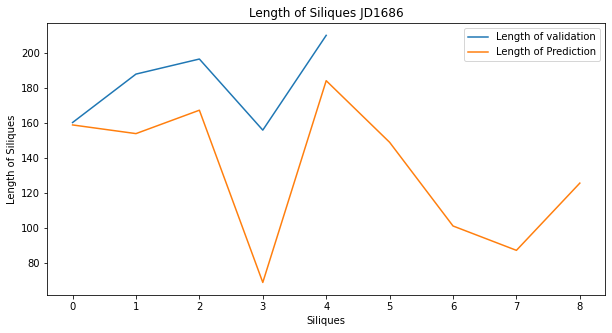

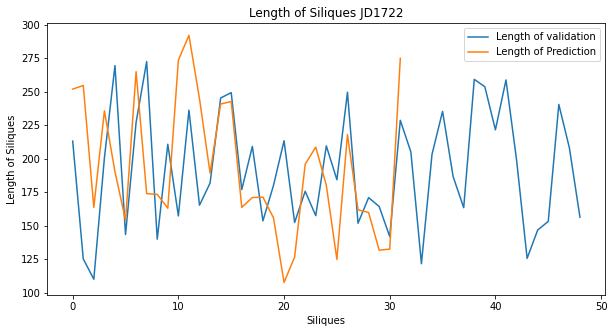

In [ ]:
def line_chart(data):
  for box_id in range(len(data['image_names'])):
    image_names=data['image_names'][box_id]
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(len(data['all_length_perimage_val'][box_id])), data['all_length_perimage_val'][box_id], label = "Length of validation")
    plt.plot(range(len(data['all_length_perimage_pre'][box_id])), data['all_length_perimage_pre'][box_id], label = "Length of Prediction")
    plt.title('Length of Siliques {}'.format(image_names))
    plt.xlabel('Siliques')
    plt.ylabel('Length of Siliques')
    plt.legend()
    plt.show()

###Brassica022 images

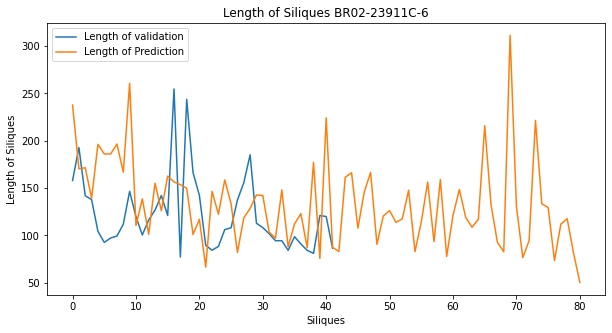

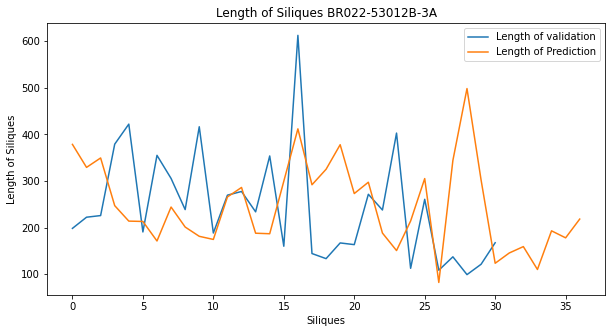

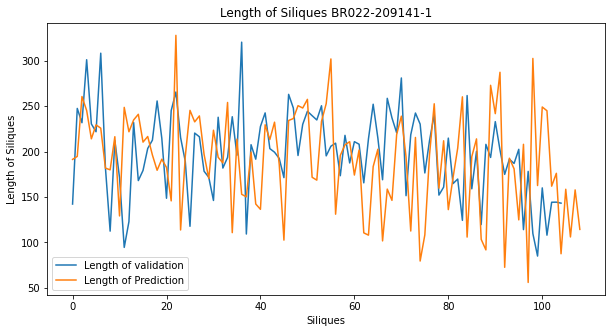

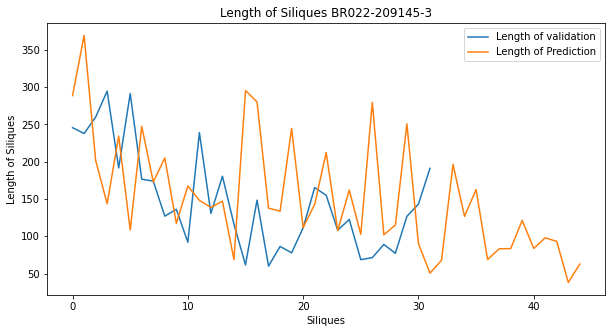

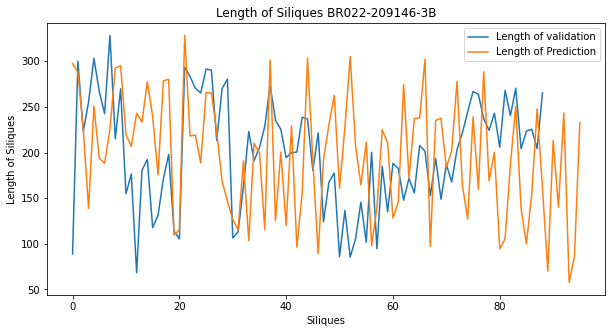

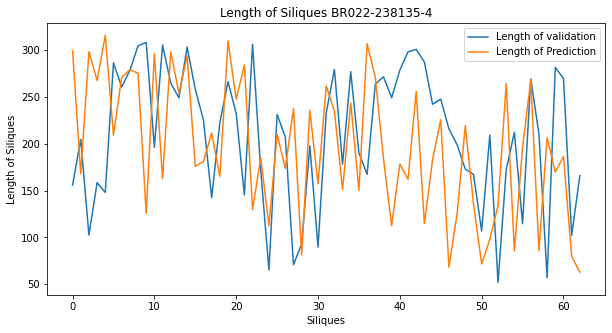

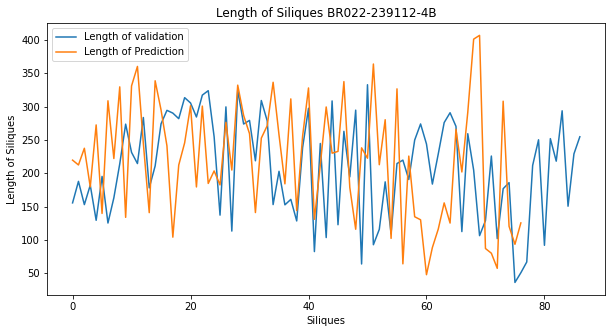

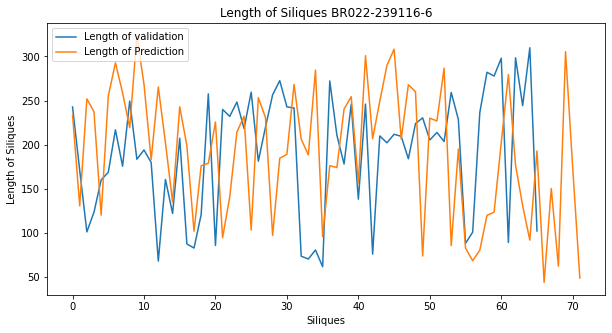

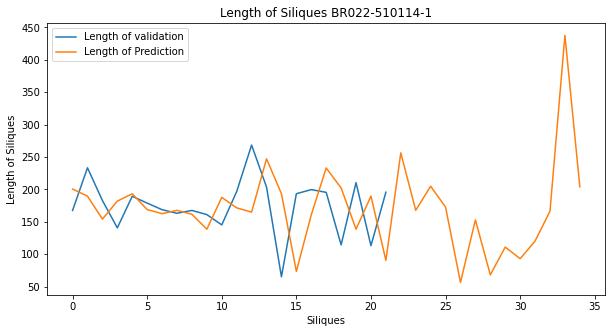

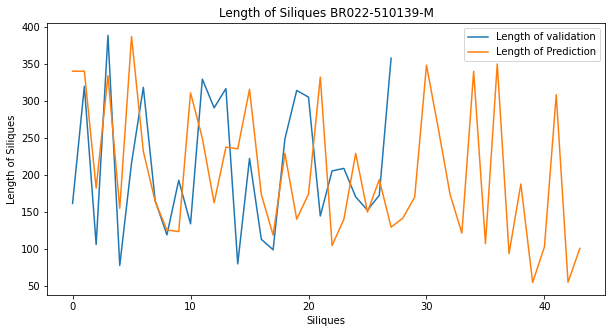

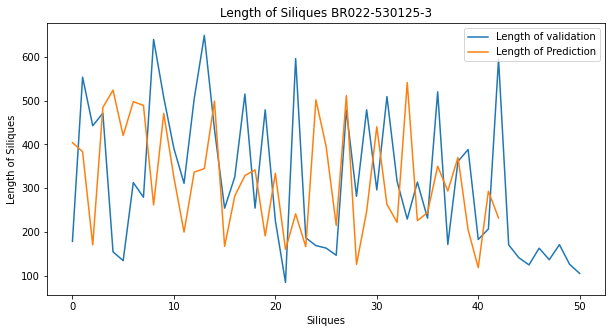

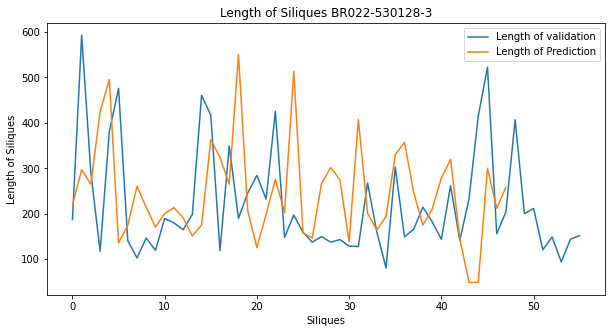

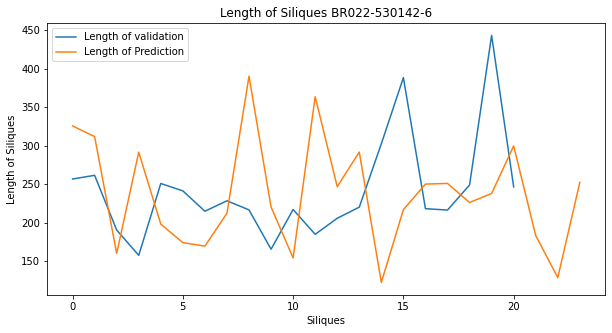

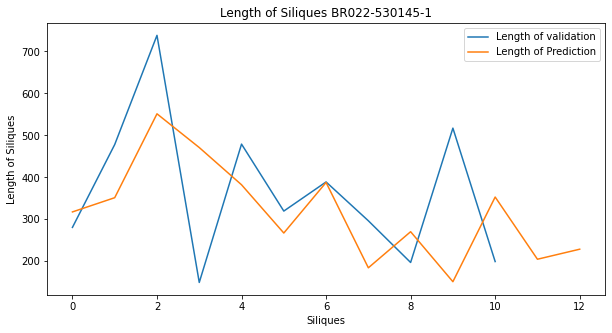

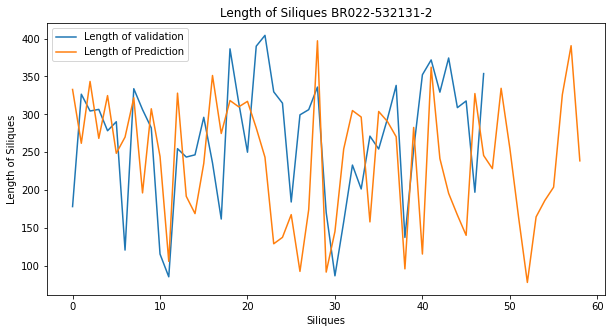

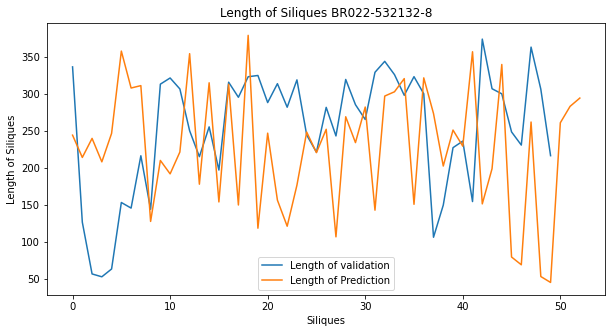

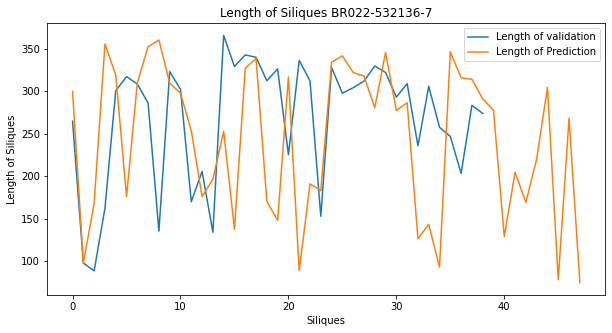

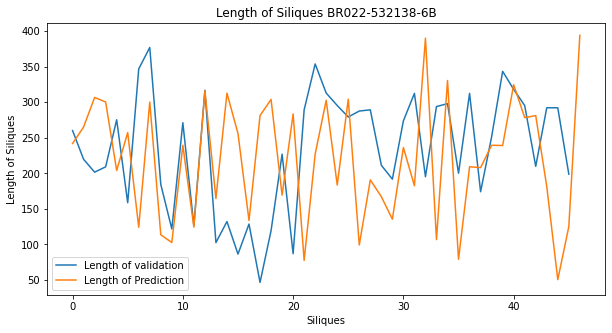

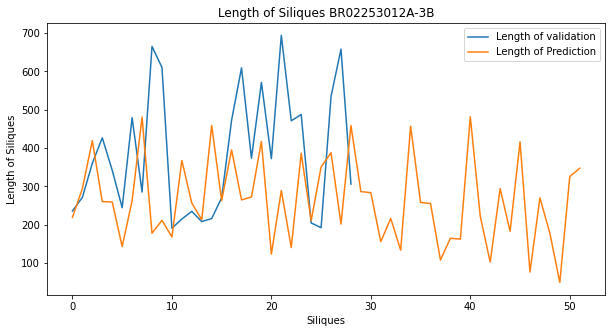

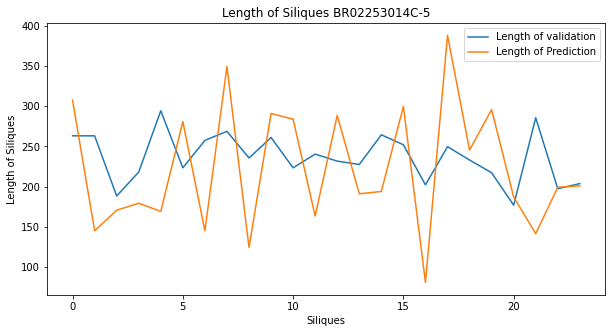

In [ ]:
def line_chart(data):
  for box_id in range(len(data['image_names'])):
    image_names=data['image_names'][box_id]
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(len(data['all_length_perimage_val'][box_id])), data['all_length_perimage_val'][box_id], label = "Length of validation")
    plt.plot(range(len(data['all_length_perimage_pre'][box_id])), data['all_length_perimage_pre'][box_id], label = "Length of Prediction")
    plt.title('Length of Siliques {}'.format(image_names))
    plt.xlabel('Siliques')
    plt.ylabel('Length of Siliques')
    plt.legend()
    plt.show()

##V. Compare number of siliques per image against validation and prediction by histogram

###Brassica017 images

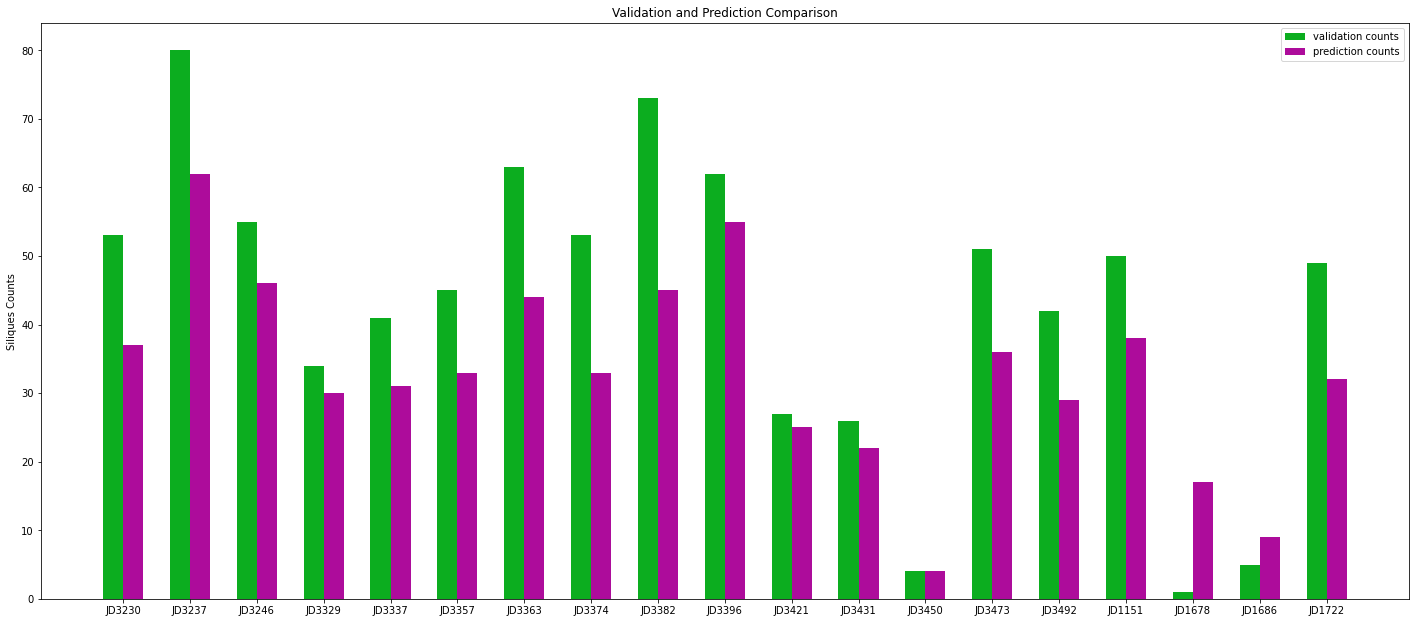

In [ ]:
def number_siliques_histogram(data):
  # create a figure
  width=0.3
  fig = plt.figure(figsize=(19, 8))
  ax = fig.add_axes([0,0,1,1])

  names = data['image_names']
  x = np.arange(len(names))

  ax.bar(x - width/2, data['validation_counts'], width, label='validation counts', color='#0CAD1F')
  ax.bar(x +width/2, data['prediction_counts'], width, label='prediction counts', color='#AD0C9B')

  ax.set_ylabel('Siliques Counts')

  ax.set_title('Validation and Prediction Comparison')

  ax.set_xticks(x)    
  ax.set_xticklabels(names, rotation='horizontal')
  ax.legend()

  plt.show()

###Brassica022 images

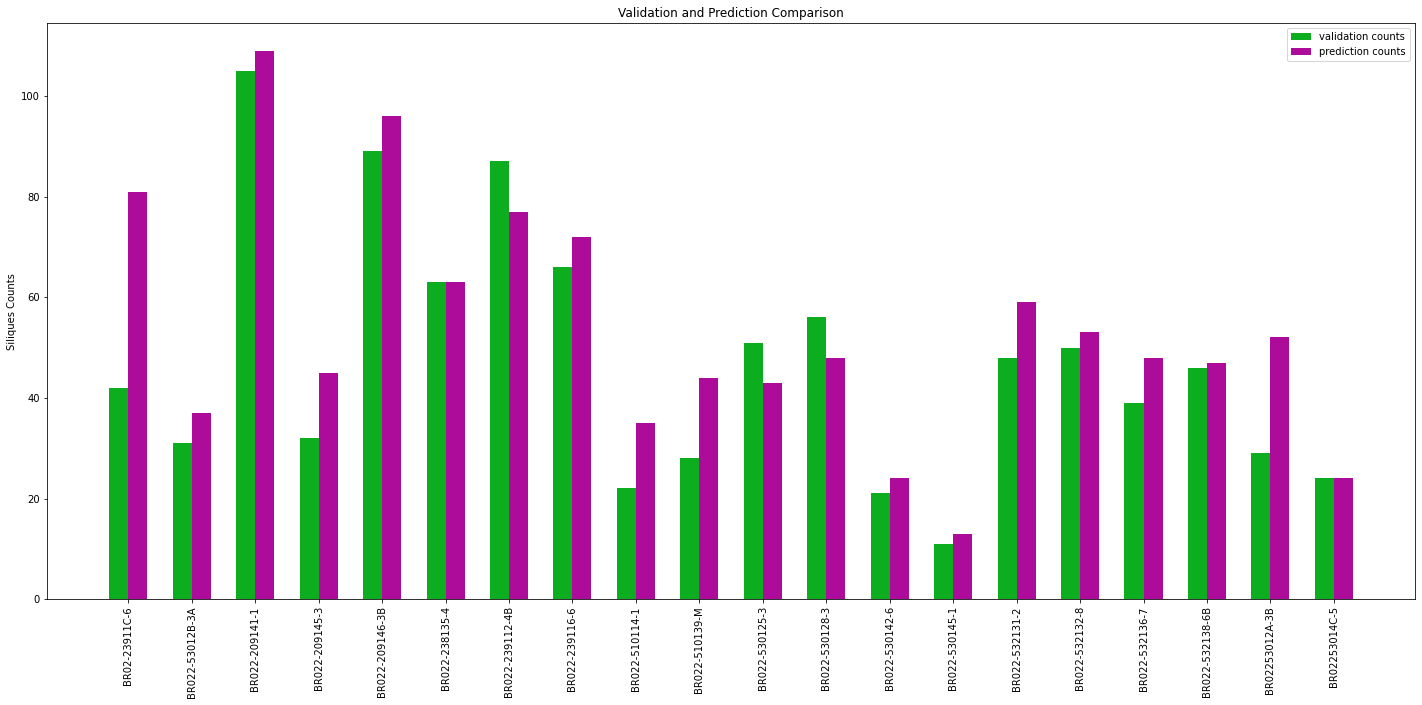

In [ ]:
def number_siliques_histogram(data):
  # create a figure
  width=0.3
  fig = plt.figure(figsize=(19, 8))
  ax = fig.add_axes([0,0,1,1])
  #x axis
  names = data['image_names']
  x = np.arange(len(names))

  # ploting each element bar
  ax.bar(x - width/2, data['validation_counts'], width, label='validation counts', color='#0CAD1F')
  ax.bar(x +width/2, data['prediction_counts'], width, label='prediction counts', color='#AD0C9B')

  #y axis
  ax.set_ylabel('Siliques Counts')

  #title 
  ax.set_title('Validation and Prediction Comparison')

  # ensure ticks for per name
  ax.set_xticks(x)    
  ax.set_xticklabels(names, rotation='vertical')
  ax.legend()

  #Matplotlib shows the plot
  plt.show()

##VI. Compare average length per image against validation and prediction by histogram

###Brassica017 images

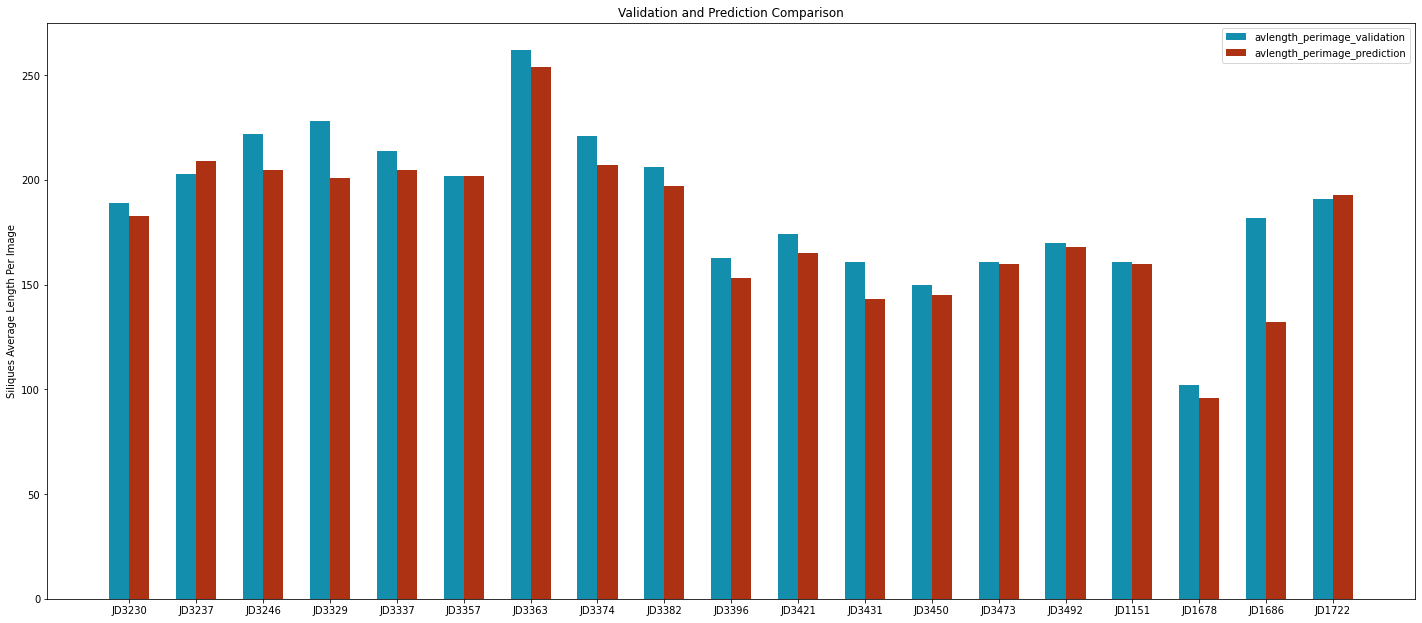

In [ ]:
def avarage_length_histogram(data):
  # create a figure
  width=0.3
  fig = plt.figure(figsize=(19, 8))
  ax = fig.add_axes([0,0,1,1])

  names = data['image_names']
  x = np.arange(len(names))

  ax.bar(x - width/2, data['avlength_perimage_validation'], width, label='avlength_perimage_validation', color='#138FAD')
  ax.bar(x + width/2, data['avlength_perimage_prediction'], width, label='avlength_perimage_prediction', color='#AD3213')

  ax.set_ylabel('Siliques Average Length Per Image')

  ax.set_title('Validation and Prediction Comparison')

  ax.set_xticks(x)    
  ax.set_xticklabels(names, rotation='horizontal')
  ax.legend()

  plt.show()

###Brassica022 images

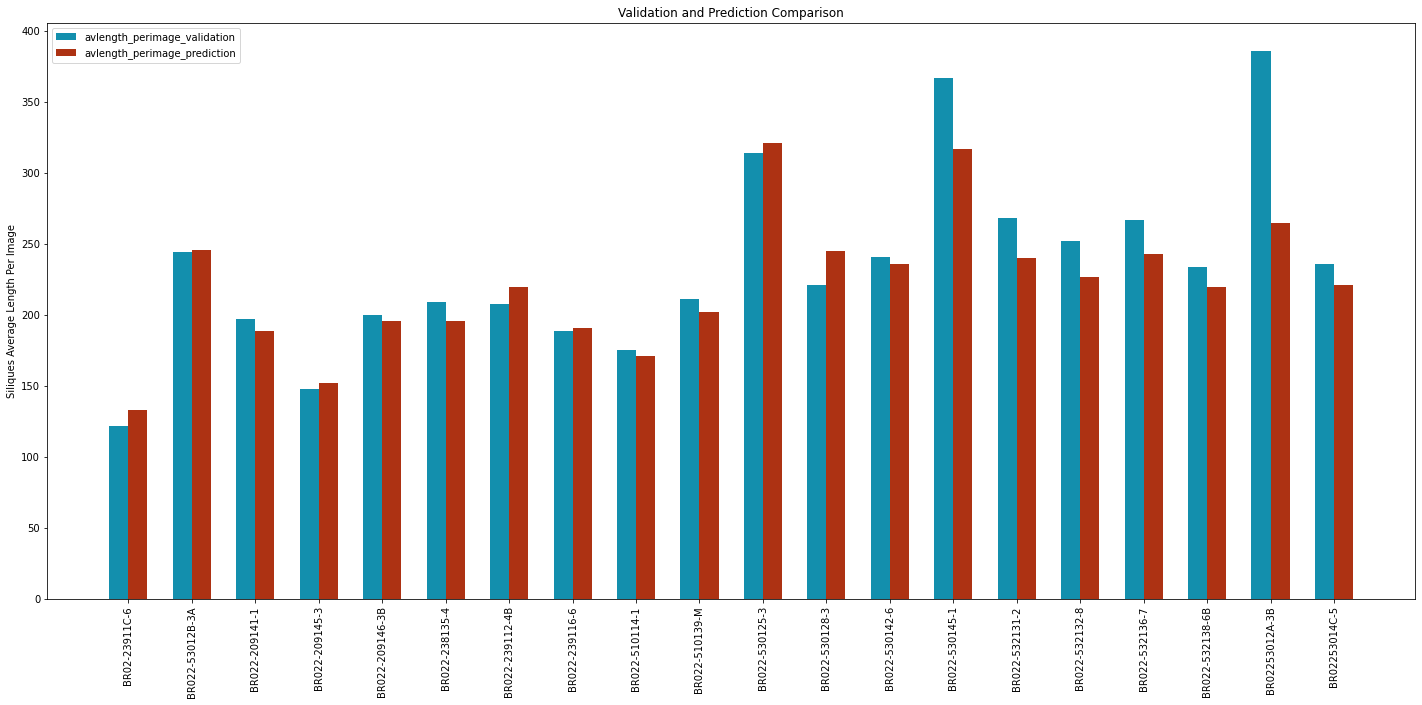

In [ ]:
def avarage_length_histogram(data):
  # create a figure
  width=0.3
  fig = plt.figure(figsize=(19, 8))
  ax = fig.add_axes([0,0,1,1])

  names = data['image_names']
  x = np.arange(len(names))

  ax.bar(x - width/2, data['avlength_perimage_validation'], width, label='avlength_perimage_validation', color='#138FAD')
  ax.bar(x + width/2, data['avlength_perimage_prediction'], width, label='avlength_perimage_prediction', color='#AD3213')

  ax.set_ylabel('Siliques Average Length Per Image')

  ax.set_title('Validation and Prediction Comparison')

  ax.set_xticks(x)    
  ax.set_xticklabels(names, rotation='vertical')
  ax.legend()

  plt.show()

##VII. Compare total number of bounding boxes of entire dataset against validation and prediction by histogram

###Brassica017

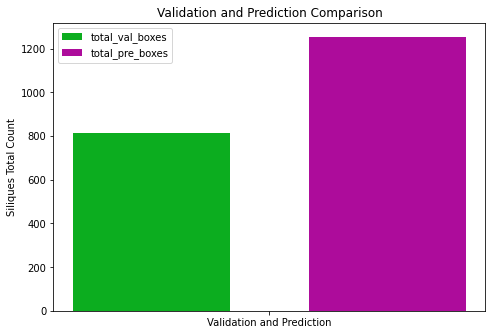

In [ ]:
def total_siliques_histogram(data):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  x = np.arange(1)

  ax.bar(x - 0.15, data['total_val_boxes'], 0.2, label='total_val_boxes', color='#0CAD1F')
  ax.bar(x + 0.15, data['total_pre_boxes'], 0.2, label='total_pre_boxes', color='#AD0C9B')

  ax.set_ylabel('Siliques Total Count')

  ax.set_title('Validation and Prediction Comparison')
  ax.set_xticks(x)   
  ax.set_xticklabels(["Validation and Prediction"], rotation='horizontal')
  ax.legend()
t
  plt.show()

###Brassica022

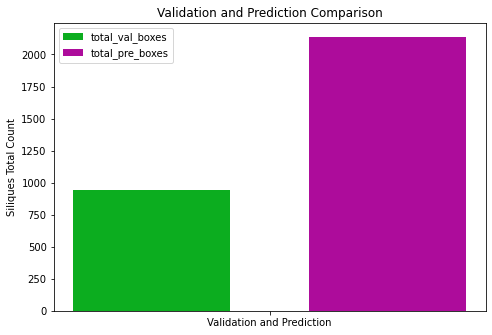

In [ ]:
def total_siliques_histogram(data):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  x = np.arange(1)
 
  ax.bar(x - 0.15, data['total_val_boxes'], 0.2, label='total_val_boxes', color='#0CAD1F')
  ax.bar(x + 0.15, data['total_pre_boxes'], 0.2, label='total_pre_boxes', color='#AD0C9B')

  ax.set_ylabel('Siliques Total Count')

  ax.set_title('Validation and Prediction Comparison')
  ax.set_xticks(x)   
  ax.set_xticklabels(["Validation and Prediction"], rotation='horizontal')
  ax.legend()

  plt.show()